# Разработка модели машинного обучения для предсказания риска сердечных приступов

**Описание проекта**

В этом проекте предполагается работа с датасетом из открытого источника. Нам потребуется разработать модель машинного обучения, а также подготовить библиотеку и интерфейс к ней для предсказания риска сердечных приступов на тестовой выборке данных о пациентах


**Цель**

Разработать модель машинного обучения для предсказания риска сердечных приступов по предоставленным данным пациентов


**План проекта**

Предполагается, что в ходе работы над проектом будут решены следующие задачи:
- Исследование датасета (предполагается поиск дополнительной информации для лучшего понимания природы данных)
- Предобработка данных
- Обучение модели
- Подготовка предсказания на тестовой выборке (Файл предсказаний должен быть в csv формате и содержать 2 столбца: “id” и “prediction”)
- Подготовка скриптов и библиотеки для обработки данных и предсказания на тестовой выборке
- Написание инструмента для тестирования
- Оформление документации

**Результат**

В результате у нас должно получиться приложение на FastAPI (или аналогичном фреймворке) которое принимает на вход путь к csv файлу тестовой выборки, выполняет предсказание (например, путем POST запроса к сервису) и возвращает ответ в формате JSON. Допускается для тестирования написать скрипт, который посылает запрос к запущенному ранее приложению, либо реализовать веб-интерфейс

    
**Описание данных**

Данные о пациентах находятся в двух файлах:
- `heart_test.csv` (тестовая выборка)
- `heart_train.csv` (тренеровочная выборка)

Перечень признаков:
- `id` - уникальный идентификатор пациента
- `Age` - возраст
- `Cholesterol` - холестерин
- `Heart rate` - частота сердечных сокращений (сердечный ритм)
- `Diabetes` - диабет (наличие: да-1/нет-0)
- `Family History` - Семейная история (наличие сердечных приступов у членов семьи: да-1/нет-0)
- `Smoking` - курение (да-1/нет-0)
- `Obesity` - ожирение (наличие: да-1/нет-0)
- `Alcohol Consumption` - Употребление алкоголя (да-1/нет-0)
- `Exercise Hours Per Week` - Часы упражнений в неделю 
- `Diet` - Диета 
(*относятся к системе лечебных диет, разработанной Певзнером, и обозначают различные диетические столы*)
- `Previous Heart Problems` - Предыдущие проблемы с сердцем (наличие: да-1/нет-0)
- `Medication Use` - Использование лекарств (да-1/нет-0)
- `Stress Level` - уровень стресса
- `Sedentary Hours Per Day` - Сидячие часы в день
- `Income` - доход
- `BMI` - индекс массы тела 
(*Это величина, применяемая для оценки степени соответствия роста и массы человека. Индекс массы тела рассчитывается по формуле: масса (кг)/ рост^2(м^2)*)
- `Triglycerides` - Триглицериды
- `Physical Activity Days Per Week` - Дней физической активности в неделю
- `Sleep Hours Per Day` - Часы сна в день
- `Blood sugar` - Содержание сахара в крови
- `CK-MB` - изофермент фермента креатинкиназы, который преимущественно содержится в сердечной мышце 
(*позволяет заподозрить инфаркт миокарда в первые часы от начала приступа и своевременно начать лечебные мероприятия. Нормой считается уровень фермента, находящийся в пределах 0-25 Ед/л. Также повышение уровня креатинкиназы может стать показателем инфаркта или воспаления сердечной мышцы, дистрофии скелетных мышц или воспалительного процесса в них*)
- `Troponin` - Тропонин 
(*Тропонин - это белок, который содержится в сердечной и скелетных мышцах. В крови здорового человека его концентрация обычно очень низкая. Однако, при повреждении сердечной мышцы, например, при инфаркте, уровень тропонина в крови значительно повышается, что делает его важным биомаркером для диагностики сердечных заболеваний*)
- `Gender` - Пол
- `Systolic blood pressure` - Систолическое артериальное давление
- `Diastolic blood pressure` - Диастолическое артериальное давление

Целевой признак (таргет)
- `Heart Attack Risk (Binary)` - Риск сердечного приступа (высокий-1/низкий-0)


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-библиотек-и-основные-настройки" data-toc-modified-id="Импорт-библиотек-и-основные-настройки-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт библиотек и основные настройки</a></span></li><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных-и-вывод-общей-информации" data-toc-modified-id="Загрузка-данных-и-вывод-общей-информации-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка данных и вывод общей информации</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-предварительному-обзору-данных" data-toc-modified-id="Вывод-по-предварительному-обзору-данных-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Вывод по предварительному обзору данных</a></span></li><li><span><a href="#Приведение-наименований-столбцов-к-стандарту-PEP8" data-toc-modified-id="Приведение-наименований-столбцов-к-стандарту-PEP8-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Приведение наименований столбцов к стандарту PEP8</a></span></li><li><span><a href="#Исключение-строк-из-датафреймов-с-пропущенными-значениями" data-toc-modified-id="Исключение-строк-из-датафреймов-с-пропущенными-значениями-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Исключение строк из датафреймов с пропущенными значениями</a></span></li><li><span><a href="#Исключение-признака-income-(доход)" data-toc-modified-id="Исключение-признака-income-(доход)-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Исключение признака <code>income</code> (доход)</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#heart_train" data-toc-modified-id="heart_train-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span><strong>heart_train</strong></a></span></li><li><span><a href="#heart_test" data-toc-modified-id="heart_test-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span><strong>heart_test</strong></a></span></li><li><span><a href="#Вывод-по-исследовательскому-анализу-данных" data-toc-modified-id="Вывод-по-исследовательскому-анализу-данных-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Вывод по исследовательскому анализу данных</a></span></li></ul></li><li><span><a href="#Подготовка-данных-для-машинного-обучения" data-toc-modified-id="Подготовка-данных-для-машинного-обучения-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Подготовка данных для машинного обучения</a></span><ul class="toc-item"><li><span><a href="#Подготовка-обучающей,-валидационной-и-тестовой-выборок" data-toc-modified-id="Подготовка-обучающей,-валидационной-и-тестовой-выборок-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Подготовка обучающей, валидационной и тестовой выборок</a></span></li><li><span><a href="#Подготовка-Pipeline" data-toc-modified-id="Подготовка-Pipeline-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Подготовка Pipeline</a></span></li></ul></li></ul></li><li><span><a href="#Обучение-различных-моделей-и-выбор-наилучшей" data-toc-modified-id="Обучение-различных-моделей-и-выбор-наилучшей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение различных моделей и выбор наилучшей</a></span><ul class="toc-item"><li><span><a href="#Поиск-оптимальной-модели-с-перебором-гиперпараметров" data-toc-modified-id="Поиск-оптимальной-модели-с-перебором-гиперпараметров-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Поиск оптимальной модели с перебором гиперпараметров</a></span></li><li><span><a href="#Поиск-оптимального-порога-на-валидационной-выборке" data-toc-modified-id="Поиск-оптимального-порога-на-валидационной-выборке-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Поиск оптимального порога на валидационной выборке</a></span></li><li><span><a href="#Получение-предсказаний-для-тестовой-выборки" data-toc-modified-id="Получение-предсказаний-для-тестовой-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Получение предсказаний для тестовой выборки</a></span></li><li><span><a href="#Анализ-важности-признаков" data-toc-modified-id="Анализ-важности-признаков-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Анализ важности признаков</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Сохранение-лучшей-модели" data-toc-modified-id="Сохранение-лучшей-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Сохранение лучшей модели</a></span></li><li><span><a href="#Приложение" data-toc-modified-id="Приложение-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Приложение</a></span></li></ul></div>

## Импорт библиотек и основные настройки

In [1]:
# установка и обновление библиотек
!pip install -q phik

In [2]:
# установка и обновление библиотек
!pip install -q shap

In [3]:
# установка и обновление библиотек
!pip install -q --upgrade scikit-learn

In [4]:
# установка и обновление библиотек 
!pip install -q catboost

In [5]:
# установка и обновление библиотек 
!pip install -q joblib

In [6]:
# импорт библиотек
import os

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import shap
from shap import TreeExplainer

import phik

import sklearn
from sklearn.model_selection import train_test_split, RandomizedSearchCV#, GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, f1_score, make_scorer, precision_recall_curve, confusion_matrix #, accuracy_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
#from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#from sklearn.svm import SVC
import joblib
from sklearn.dummy import DummyClassifier


import catboost
from catboost import CatBoostClassifier
#from catboost.utils import eval_metric

# shapiro для проверки распределения на нормальность с помощью теста Шапиро-Уилка
# ttest_ind ttest для двух независимых выборок
from scipy import stats
from scipy.stats import shapiro, ttest_ind, randint

# для проверки на мультиколлинеарность признаков с помощью VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from statsmodels.tools.tools import add_constant  

In [7]:
# вывод версий основных библиотек
print('Scikit-learn version is {}.'.format(sklearn.__version__))
print('Сatboost version is {}.'.format(catboost.__version__))
print('Pandas version is {}.'.format(pd.__version__))
print('Matplotlib version is {}.'.format(mpl.__version__))
print('Numpy version is {}.'.format(np.__version__))
print('joblib version is {}.'.format(joblib.__version__))

#print('Scipy version is {}.'.format(scipy.__version__))

Scikit-learn version is 1.6.1.
Сatboost version is 1.0.3.
Pandas version is 1.2.4.
Matplotlib version is 3.3.4.
Numpy version is 1.21.1.
joblib version is 1.5.1.


In [8]:
# Фиксируем константы
RANDOM_STATE = 42
TEST_SIZE = 0.2
CV = 3

# изменение максимального количества столбцов для отображения на 30
pd.options.display.max_columns = 30

# устанавливаем формат вывода чисел с разделителем между разрядами и оставим 2 знака после точки
#pd.set_option('display.float_format', '{:,.2f}'.format)

## Загрузка и подготовка данных

### Загрузка данных и вывод общей информации

In [9]:
pth_heart_train = 'heart_train.csv'
pth_heart_test = 'heart_test.csv'

if os.path.exists(pth_heart_train):
    heart_train = pd.read_csv(pth_heart_train, index_col=0)
else:
    print('Файл heart_train.csv для загрузки не найден')
    
if os.path.exists(pth_heart_test):
    heart_test = pd.read_csv(pth_heart_test, index_col=0)
else:
    print('Файл heart_test.csv для загрузки не найден')

In [10]:
# создадим функцию для вывода основной информации о датафрейме
def data_info(dataframe):
    """
    Функция выводит основную информацию о датафрейме: 
    - первые 5 строк, 
    - общую информацию,
    - количество явных дубликатов,
    - основные статистики,
    - количество пропусков (в том числе в %)

    Args:
        dataframe (pd.DataFrame): датафрейм 

    Returns:
        None

    """
    display(dataframe.head())
    print('------------------------------------------------------------------------')
    print('Основная информация о датафрейме:')
    print(dataframe.info())
    print('------------------------------------------------------------------------')
    print('Количество явных дубликатов:', dataframe.duplicated().sum())
    print('------------------------------------------------------------------------')
    print('Числовое описание данных:')
    try:
        display(dataframe.describe().T)
        display(dataframe.describe(include='object').T)
    except:
        display(dataframe.describe().T)
    print('------------------------------------------------------------------------')
    print('Количество пропущенных значений (количество и %):')
    display(pd.DataFrame(dataframe.isna().sum())
            .sort_values(by=0,ascending=False)
            .style.background_gradient('coolwarm'))
    display(pd.DataFrame(dataframe.isna().mean())
            .sort_values(by=0, ascending=False)
            .style.format('{:.2%}')
            .background_gradient('coolwarm'))

In [11]:
# применим функцию "data_info(dataframe)" для загруженных датафреймов
data_info(heart_train)

,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk (Binary),Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure,id
0,0.359551,0.732143,0.074244,1.0,1.0,1.0,1.0,1.0,0.535505,1,1.0,0.0,8.0,0.225704,0.105948,0.459176,0.979221,3.0,0.333333,0.0,0.227018,0.048229,0.036512,Male,0.212903,0.709302,2664
1,0.202247,0.325000,0.047663,1.0,1.0,0.0,0.0,1.0,0.068690,2,1.0,0.0,9.0,0.289923,0.164217,0.117053,0.515584,3.0,0.833333,0.0,0.150198,0.017616,0.000194,Female,0.412903,0.569767,9287
2,0.606742,0.860714,0.055912,1.0,0.0,1.0,1.0,1.0,0.944001,2,1.0,1.0,6.0,0.550133,0.598745,0.373574,0.012987,2.0,1.000000,0.0,0.227018,0.048229,0.036512,Female,0.238710,0.220930,5379
3,0.730337,0.007143,0.053162,0.0,0.0,1.0,0.0,1.0,0.697023,0,0.0,1.0,3.0,0.330962,0.077605,0.049735,0.131169,0.0,0.333333,1.0,0.227018,0.048229,0.036512,Female,0.348387,0.267442,8222
4,0.775281,0.757143,0.021998,0.0,0.0,1.0,0.0,1.0,0.412878,1,0.0,0.0,8.0,0.524600,0.341960,0.830405,0.070130,5.0,1.000000,1.0,0.227018,0.048229,0.036512,Male,0.619355,0.441860,4047


------------------------------------------------------------------------
Основная информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8685 entries, 0 to 8684
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8685 non-null   float64
 1   Cholesterol                      8685 non-null   float64
 2   Heart rate                       8685 non-null   float64
 3   Diabetes                         8442 non-null   float64
 4   Family History                   8442 non-null   float64
 5   Smoking                          8442 non-null   float64
 6   Obesity                          8442 non-null   float64
 7   Alcohol Consumption              8442 non-null   float64
 8   Exercise Hours Per Week          8685 non-null   float64
 9   Diet                             8685 non-null   int64  
 10  Previous Heart Problems          8442

,count,mean,std,min,25%,50%,75%,max
Age,8685.0,0.449958,0.231174,0.0,0.258427,0.460674,0.640449,1.0
Cholesterol,8685.0,0.501070,0.284716,0.0,0.267857,0.499780,0.746429,1.0
Heart rate,8685.0,0.050658,0.023453,0.0,0.034830,0.050412,0.065995,1.0
Diabetes,8442.0,0.652097,0.476333,0.0,0.000000,1.000000,1.000000,1.0
Family History,8442.0,0.489576,0.499921,0.0,0.000000,0.000000,1.000000,1.0
Smoking,8442.0,0.902867,0.296157,0.0,1.000000,1.000000,1.000000,1.0
Obesity,8442.0,0.498342,0.500027,0.0,0.000000,0.000000,1.000000,1.0
Alcohol Consumption,8442.0,0.601990,0.489517,0.0,0.000000,1.000000,1.000000,1.0
Exercise Hours Per Week,8685.0,0.503378,0.284810,0.0,0.263286,0.502110,0.748709,1.0
Diet,8685.0,1.057455,0.866645,0.0,0.000000,1.000000,2.000000,3.0


,count,unique,top,freq
Gender,8685,4,Male,5882


------------------------------------------------------------------------
Количество пропущенных значений (количество и %):


,0
Physical Activity Days Per Week,243
Diabetes,243
Family History,243
Smoking,243
Obesity,243
Alcohol Consumption,243
Previous Heart Problems,243
Medication Use,243
Stress Level,243
Troponin,0


,0
Physical Activity Days Per Week,2.80%
Diabetes,2.80%
Family History,2.80%
Smoking,2.80%
Obesity,2.80%
Alcohol Consumption,2.80%
Previous Heart Problems,2.80%
Medication Use,2.80%
Stress Level,2.80%
Troponin,0.00%


In [12]:
# применим функцию "data_info(dataframe)" для загруженных датафреймов
data_info(heart_test)

,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure,id
0,0.494382,0.264286,0.062328,0.0,1.0,1.0,1.0,1.0,0.361618,2,0.0,0.0,8.0,0.194370,0.587759,0.283490,0.306494,1.0,0.333333,0.227018,0.048229,0.036512,Male,0.283871,0.372093,7746
1,0.224719,0.953571,0.082493,1.0,0.0,0.0,1.0,0.0,0.996483,2,1.0,1.0,5.0,0.329888,0.602883,0.467036,0.087013,0.0,0.166667,0.227018,0.048229,0.036512,Female,0.703226,0.441860,4202
2,0.629213,0.092857,0.064161,0.0,1.0,1.0,1.0,0.0,0.995561,0,0.0,0.0,10.0,0.780075,0.370436,0.409366,0.205195,7.0,1.000000,0.102767,0.002666,0.088455,Male,0.458065,0.779070,6632
3,0.460674,0.567857,0.055912,1.0,1.0,1.0,1.0,1.0,0.437277,0,0.0,0.0,10.0,0.785071,0.368242,0.910261,0.163636,0.0,0.666667,0.203557,0.056390,0.271774,Female,0.741935,0.255814,4639
4,0.719101,0.485714,0.022915,1.0,0.0,1.0,0.0,1.0,0.514920,0,0.0,0.0,7.0,0.070919,0.729578,0.758924,0.580519,5.0,0.000000,0.227018,0.048229,0.036512,Male,0.412903,0.395349,4825


------------------------------------------------------------------------
Основная информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 966 entries, 0 to 965
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              966 non-null    float64
 1   Cholesterol                      966 non-null    float64
 2   Heart rate                       966 non-null    float64
 3   Diabetes                         935 non-null    float64
 4   Family History                   935 non-null    float64
 5   Smoking                          935 non-null    float64
 6   Obesity                          935 non-null    float64
 7   Alcohol Consumption              935 non-null    float64
 8   Exercise Hours Per Week          966 non-null    float64
 9   Diet                             966 non-null    int64  
 10  Previous Heart Problems          935 no

,count,mean,std,min,25%,50%,75%,max
Age,966.0,0.452916,0.231068,0.044944,0.247191,0.460674,0.640449,0.853933
Cholesterol,966.0,0.488181,0.282039,0.000000,0.243750,0.499780,0.710714,0.996429
Heart rate,966.0,0.051644,0.035502,0.000000,0.036664,0.050412,0.065995,1.000000
Diabetes,935.0,0.656684,0.475070,0.000000,0.000000,1.000000,1.000000,1.000000
Family History,935.0,0.481283,0.499917,0.000000,0.000000,0.000000,1.000000,1.000000
Smoking,935.0,0.898396,0.302289,0.000000,1.000000,1.000000,1.000000,1.000000
Obesity,935.0,0.516578,0.499993,0.000000,0.000000,1.000000,1.000000,1.000000
Alcohol Consumption,935.0,0.583957,0.493165,0.000000,0.000000,1.000000,1.000000,1.000000
Exercise Hours Per Week,966.0,0.490706,0.284902,0.000336,0.243431,0.502110,0.734425,0.998938
Diet,966.0,1.053830,0.884642,0.000000,0.000000,1.000000,2.000000,3.000000


,count,unique,top,freq
Gender,966,4,Male,650


------------------------------------------------------------------------
Количество пропущенных значений (количество и %):


,0
Diabetes,31
Family History,31
Smoking,31
Obesity,31
Alcohol Consumption,31
Physical Activity Days Per Week,31
Previous Heart Problems,31
Medication Use,31
Stress Level,31
Age,0


,0
Diabetes,3.21%
Family History,3.21%
Smoking,3.21%
Obesity,3.21%
Alcohol Consumption,3.21%
Physical Activity Days Per Week,3.21%
Previous Heart Problems,3.21%
Medication Use,3.21%
Stress Level,3.21%
Age,0.00%


In [13]:
# проанализируем датафреймы на наличие неявных дубликатов
# сформируем список словарей для столбцов с типом данных 'object', 
# ключ - название столбца, а значение - список уникальных значений столбца
[
    {i: heart_train[i].unique()} 
    for i in heart_train.columns 
    if heart_train[i].dtype == 'object'
]

[{'Gender': array(['Male', 'Female', '1.0', '0.0'], dtype=object)}]

In [14]:
print(heart_train['Gender'].value_counts())

Male      5882
Female    2560
1.0        156
0.0         87
Name: Gender, dtype: int64


In [15]:
display(heart_train.loc[(heart_train['Gender']=='0.0') |  (heart_train['Gender']=='1.0')].head(10))
display(heart_train.loc[(heart_train['Gender']=='0.0') |  (heart_train['Gender']=='1.0')].describe().T)

,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk (Binary),Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure,id
16,0.449438,0.49978,0.063245,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.0,0.233202,0.026692,0.000777,1.0,0.393548,0.255814,9528
90,0.370787,0.49978,0.066911,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.0,0.154150,0.004702,0.042043,1.0,0.258065,0.337209,9640
92,0.629213,0.49978,0.073327,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.0,0.256917,0.012310,0.000777,0.0,0.258065,0.232558,9515
185,0.516854,0.49978,0.045830,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.0,0.559289,0.006704,0.000291,0.0,0.174194,0.151163,9491
188,0.269663,0.49978,0.035747,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.0,0.112648,0.051218,0.000485,0.0,0.225806,0.162791,9448
204,0.674157,0.49978,0.065078,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.0,0.120553,0.002299,0.003010,1.0,0.167742,0.162791,9594
247,0.629213,0.49978,0.084326,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.0,0.150198,0.002933,0.133896,1.0,0.677419,0.720930,9570
392,0.370787,0.49978,0.067828,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.0,0.197628,0.119858,0.025439,1.0,0.258065,0.453488,9649
415,0.415730,0.49978,0.056829,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.0,0.140316,0.004435,0.001748,1.0,0.470968,0.593023,9625
416,0.404494,0.49978,0.102658,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.0,0.193676,0.009540,0.034275,1.0,0.387097,0.372093,9574


,count,mean,std,min,25%,50%,75%,max
Age,243.0,0.482961,1.615215e-01,0.000000,0.370787,0.516854,0.578652,1.000000
Cholesterol,243.0,0.499780,0.000000e+00,0.499780,0.499780,0.499780,0.499780,0.499780
Heart rate,243.0,0.066760,8.722131e-02,0.000000,0.045830,0.056829,0.069661,1.000000
Diabetes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Family History,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Smoking,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Obesity,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alcohol Consumption,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exercise Hours Per Week,243.0,0.502110,0.000000e+00,0.502110,0.502110,0.502110,0.502110,0.502110
Diet,243.0,3.000000,0.000000e+00,3.000000,3.000000,3.000000,3.000000,3.000000


In [16]:
# проанализируем датафреймы на наличие неявных дубликатов
# сформируем список словарей для столбцов с типом данных 'object', 
# ключ - название столбца, а значение - список уникальных значений столбца
[
    {i: heart_test[i].unique()} 
    for i in heart_test.columns 
    if heart_test[i].dtype == 'object'
]

[{'Gender': array(['Male', 'Female', '1.0', '0.0'], dtype=object)}]

In [17]:
print(heart_test['Gender'].value_counts())

Male      650
Female    285
1.0        22
0.0         9
Name: Gender, dtype: int64


In [18]:
display(heart_test.loc[(heart_test['Gender']=='0.0') |  (heart_test['Gender']=='1.0')].head(10))
display(heart_test.loc[(heart_test['Gender']=='0.0') |  (heart_test['Gender']=='1.0')].describe().T)

,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure,id
27,0.370787,0.49978,0.034830,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.181818,0.011843,0.000194,1.0,0.419355,0.441860,9613
37,0.573034,0.49978,0.043080,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.167984,0.011209,0.000971,1.0,0.722581,0.732558,9471
58,0.516854,0.49978,0.045830,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.098814,0.036436,0.002233,1.0,0.387097,0.500000,9486
60,0.370787,0.49978,0.056829,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.199605,0.005970,0.006408,1.0,0.387097,0.220930,9391
61,0.483146,0.49978,0.028414,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.112648,0.013111,0.000680,1.0,0.419355,0.325581,9579
156,0.516854,0.49978,0.045830,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.219368,1.000000,0.000583,1.0,0.335484,0.220930,9490
208,0.449438,0.49978,0.036664,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.264822,0.008906,0.002136,1.0,0.380645,0.186047,9617
235,0.325843,0.49978,0.029331,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.128458,0.002196,0.000583,0.0,0.387097,0.302326,9465
265,0.471910,0.49978,0.056829,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.083004,0.020218,0.000485,0.0,0.096774,0.441860,9562
339,0.348315,0.49978,0.054079,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.207510,0.006137,0.000388,0.0,0.174194,0.151163,9412


,count,mean,std,min,25%,50%,75%,max
Age,31.0,0.477347,1.180888e-01,0.280899,0.359551,0.483146,0.578652,0.651685
Cholesterol,31.0,0.499780,1.128575e-16,0.499780,0.499780,0.499780,0.499780,0.499780
Heart rate,31.0,0.082404,1.714934e-01,0.000000,0.038955,0.048579,0.063703,1.000000
Diabetes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Family History,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Smoking,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Obesity,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alcohol Consumption,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exercise Hours Per Week,31.0,0.502110,0.000000e+00,0.502110,0.502110,0.502110,0.502110,0.502110
Diet,31.0,3.000000,0.000000e+00,3.000000,3.000000,3.000000,3.000000,3.000000


In [19]:
print(heart_test['Diet'].value_counts())
display(heart_test.loc[heart_test['Diet']==3.0].head(10))
display(heart_test.loc[heart_test['Diet']==3.0].describe().T)

0    322
2    312
1    301
3     31
Name: Diet, dtype: int64


,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure,id
27,0.370787,0.49978,0.034830,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.181818,0.011843,0.000194,1.0,0.419355,0.441860,9613
37,0.573034,0.49978,0.043080,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.167984,0.011209,0.000971,1.0,0.722581,0.732558,9471
58,0.516854,0.49978,0.045830,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.098814,0.036436,0.002233,1.0,0.387097,0.500000,9486
60,0.370787,0.49978,0.056829,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.199605,0.005970,0.006408,1.0,0.387097,0.220930,9391
61,0.483146,0.49978,0.028414,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.112648,0.013111,0.000680,1.0,0.419355,0.325581,9579
156,0.516854,0.49978,0.045830,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.219368,1.000000,0.000583,1.0,0.335484,0.220930,9490
208,0.449438,0.49978,0.036664,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.264822,0.008906,0.002136,1.0,0.380645,0.186047,9617
235,0.325843,0.49978,0.029331,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.128458,0.002196,0.000583,0.0,0.387097,0.302326,9465
265,0.471910,0.49978,0.056829,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.083004,0.020218,0.000485,0.0,0.096774,0.441860,9562
339,0.348315,0.49978,0.054079,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.207510,0.006137,0.000388,0.0,0.174194,0.151163,9412


,count,mean,std,min,25%,50%,75%,max
Age,31.0,0.477347,1.180888e-01,0.280899,0.359551,0.483146,0.578652,0.651685
Cholesterol,31.0,0.499780,1.128575e-16,0.499780,0.499780,0.499780,0.499780,0.499780
Heart rate,31.0,0.082404,1.714934e-01,0.000000,0.038955,0.048579,0.063703,1.000000
Diabetes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Family History,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Smoking,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Obesity,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alcohol Consumption,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exercise Hours Per Week,31.0,0.502110,0.000000e+00,0.502110,0.502110,0.502110,0.502110,0.502110
Diet,31.0,3.000000,0.000000e+00,3.000000,3.000000,3.000000,3.000000,3.000000


In [20]:
print(heart_train['Diet'].value_counts())
display(heart_train.loc[heart_train['Diet']==3.0].head(10))
display(heart_train.loc[heart_train['Diet']==3.0].describe().T)

1    2863
2    2796
0    2783
3     243
Name: Diet, dtype: int64


,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk (Binary),Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure,id
16,0.449438,0.49978,0.063245,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.0,0.233202,0.026692,0.000777,1.0,0.393548,0.255814,9528
90,0.370787,0.49978,0.066911,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.0,0.154150,0.004702,0.042043,1.0,0.258065,0.337209,9640
92,0.629213,0.49978,0.073327,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.0,0.256917,0.012310,0.000777,0.0,0.258065,0.232558,9515
185,0.516854,0.49978,0.045830,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.0,0.559289,0.006704,0.000291,0.0,0.174194,0.151163,9491
188,0.269663,0.49978,0.035747,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.0,0.112648,0.051218,0.000485,0.0,0.225806,0.162791,9448
204,0.674157,0.49978,0.065078,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.0,0.120553,0.002299,0.003010,1.0,0.167742,0.162791,9594
247,0.629213,0.49978,0.084326,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.0,0.150198,0.002933,0.133896,1.0,0.677419,0.720930,9570
392,0.370787,0.49978,0.067828,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.0,0.197628,0.119858,0.025439,1.0,0.258065,0.453488,9649
415,0.415730,0.49978,0.056829,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.0,0.140316,0.004435,0.001748,1.0,0.470968,0.593023,9625
416,0.404494,0.49978,0.102658,NaN,NaN,NaN,NaN,NaN,0.50211,3,NaN,NaN,NaN,0.49992,0.494889,0.494774,0.503603,NaN,0.504621,0.0,0.193676,0.009540,0.034275,1.0,0.387097,0.372093,9574


,count,mean,std,min,25%,50%,75%,max
Age,243.0,0.482961,1.615215e-01,0.000000,0.370787,0.516854,0.578652,1.000000
Cholesterol,243.0,0.499780,0.000000e+00,0.499780,0.499780,0.499780,0.499780,0.499780
Heart rate,243.0,0.066760,8.722131e-02,0.000000,0.045830,0.056829,0.069661,1.000000
Diabetes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Family History,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Smoking,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Obesity,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alcohol Consumption,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exercise Hours Per Week,243.0,0.502110,0.000000e+00,0.502110,0.502110,0.502110,0.502110,0.502110
Diet,243.0,3.000000,0.000000e+00,3.000000,3.000000,3.000000,3.000000,3.000000


<a id="conclusion1"></a>

___
#### Вывод по предварительному обзору данных


1. `heart_train`:
    - 8685 строк (наблюдений) и 27 столбцов (признаков);
    - наименования столбцов не соответствуют стандарту PEP8, необходимо перевести их в нижний регистр и дефисы/пробелы/скобки заменить на нижнее подчеркивание ("_");
    - в 9 столбцах пропущено 243 (2.8%) значений (`Physical Activity Days Per Week`, `Diabetes`, `Family History`, `Smoking`, `Obesity`, `Alcohol Consumption`, `Previous Heart Problems`, `Medication Use`, `Stress Level`), также дополнительно стоит отметить:
        - для 7 столбцов (количественных признаков: `Cholesterol`, `Exercise Hours Per Week`, `Sedentary Hours Per Day`, `Income`, `BMI`, `Triglycerides`, `Sleep Hours Per Day`) данные заполнены медианным значением самого признака на основе всего датасета; 
        - значение признака `Diet` равно `3`;
        - в значениях признака `Gender` указано `0.0` или `1.0`, когда в остальных случаях указано `Male` или `Famale`;
        - Целевой признак `Heart Attack Risk (Binary)` равен `0` (низкая вероятность)
    - явные дубликаты отсутствуют; 
    - для 10 столбцов с категориальными и бинарными признаками предлагаю изменить тип данных с `float` на `int` (`Diabetes`, `Family History`, `Smoking`, `Obesity`, `Alcohol Consumption`, `Previous Heart Problems`, `Medication Use`, `Stress Level`, `Physical Activity Days Per Week`, `Heart Attack Risk (Binary)`);
    - Столбцы с количественными признаками масштабированы в пределах от 0 до 1
    - Столбец `Heart Attack Risk (Binary)` - целевой признак


2. `heart_test`:
    - 966 строк (наблюдений) и 26 столбцов (признаков);
    - наименования столбцов не соответствуют стандарту PEP8, необходимо перевести их в нижний регистр и дефисы/пробелы заменить на нижнее подчеркивание ("_");
    - в таких же 9 столбцах пропущено 31 (3.2%) значений (`Physical Activity Days Per Week`, `Diabetes`, `Family History`, `Smoking`, `Obesity`, `Alcohol Consumption`, `Previous Heart Problems`, `Medication Use`, `Stress Level`), также дополнительно стоит отметить:
        - для 7 столбцов (количественных признаков:`Cholesterol`, `Exercise Hours Per Week`, `Sedentary Hours Per Day`, `Income`, `BMI`, `Triglycerides`, `Sleep Hours Per Day`) данные заполнены медианным значением самого признака на основе всего датасета 
        - значение признака `Diet` равно `3`
        - в значениях признака `Gender` указано `0.0` или `1.0`, когда в остальных случаях указано `Male` или `Famale`
    - явные дубликаты отсутствуют; 
    - для 9 столбцов с категориальными и бинарными признаками предлагаю изменить тип данных с `float` на `int` (`Diabetes`, `Family History`, `Smoking`, `Obesity`, `Alcohol Consumption`, `Previous Heart Problems`, `Medication Use`, `Stress Level`, `Physical Activity Days Per Week`);
    - Столбцы с количественными признаками масштабированы в пределах от 0 до 1

Предлагаю далее в обоих датасетах исключить строки с пропущенными значениями, потому что:
- возможен риск утечки целевого признака - для всех значений целевого признака риск сердечных приступов минимален при значении признака `Diet` равно `3`;
- объем пропущенных значений составляет около 3% от общего числа значений признаков в датасетах
- медианные значения в признаках указывают на "синтетическую" природу их происхождения

Дополнительно предлагаю из датасета исключить признак `Income`, доход (предпологаю, который принес пациет) врятли может влиять на риск сердечных приступов
___

#### Приведение наименований столбцов к стандарту PEP8

In [21]:
# создадим функцию для приведения наименований столбцов датасетов к стандарту PEP8
def normalize_column_names(dataframe):
    """
    Функция изменяет название столбцов датафрейма:
    - приводит к нижнему регистру;
    - заменяет пробелы, дефисы и скобки на нижнее подчеркивание

    Args:
        dataframe (pd.DataFrame): исходный датафрейм
        
    Returns:
        Исходный датафрейм с измененными названиями
    """
    def change_name(name):
        name = name.lower()
        for char in [' ', '-', '(', ')']:
            name = name.replace(char, '_')
        return name
    new_columns = [change_name(col) for col in dataframe.columns]
    dataframe.columns = new_columns 

In [22]:
normalize_column_names(heart_train)
heart_train.head()

,age,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,diet,previous_heart_problems,medication_use,stress_level,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,heart_attack_risk__binary_,blood_sugar,ck_mb,troponin,gender,systolic_blood_pressure,diastolic_blood_pressure,id
0,0.359551,0.732143,0.074244,1.0,1.0,1.0,1.0,1.0,0.535505,1,1.0,0.0,8.0,0.225704,0.105948,0.459176,0.979221,3.0,0.333333,0.0,0.227018,0.048229,0.036512,Male,0.212903,0.709302,2664
1,0.202247,0.325000,0.047663,1.0,1.0,0.0,0.0,1.0,0.068690,2,1.0,0.0,9.0,0.289923,0.164217,0.117053,0.515584,3.0,0.833333,0.0,0.150198,0.017616,0.000194,Female,0.412903,0.569767,9287
2,0.606742,0.860714,0.055912,1.0,0.0,1.0,1.0,1.0,0.944001,2,1.0,1.0,6.0,0.550133,0.598745,0.373574,0.012987,2.0,1.000000,0.0,0.227018,0.048229,0.036512,Female,0.238710,0.220930,5379
3,0.730337,0.007143,0.053162,0.0,0.0,1.0,0.0,1.0,0.697023,0,0.0,1.0,3.0,0.330962,0.077605,0.049735,0.131169,0.0,0.333333,1.0,0.227018,0.048229,0.036512,Female,0.348387,0.267442,8222
4,0.775281,0.757143,0.021998,0.0,0.0,1.0,0.0,1.0,0.412878,1,0.0,0.0,8.0,0.524600,0.341960,0.830405,0.070130,5.0,1.000000,1.0,0.227018,0.048229,0.036512,Male,0.619355,0.441860,4047


In [23]:
normalize_column_names(heart_test)
heart_test.head()

,age,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,diet,previous_heart_problems,medication_use,stress_level,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,blood_sugar,ck_mb,troponin,gender,systolic_blood_pressure,diastolic_blood_pressure,id
0,0.494382,0.264286,0.062328,0.0,1.0,1.0,1.0,1.0,0.361618,2,0.0,0.0,8.0,0.194370,0.587759,0.283490,0.306494,1.0,0.333333,0.227018,0.048229,0.036512,Male,0.283871,0.372093,7746
1,0.224719,0.953571,0.082493,1.0,0.0,0.0,1.0,0.0,0.996483,2,1.0,1.0,5.0,0.329888,0.602883,0.467036,0.087013,0.0,0.166667,0.227018,0.048229,0.036512,Female,0.703226,0.441860,4202
2,0.629213,0.092857,0.064161,0.0,1.0,1.0,1.0,0.0,0.995561,0,0.0,0.0,10.0,0.780075,0.370436,0.409366,0.205195,7.0,1.000000,0.102767,0.002666,0.088455,Male,0.458065,0.779070,6632
3,0.460674,0.567857,0.055912,1.0,1.0,1.0,1.0,1.0,0.437277,0,0.0,0.0,10.0,0.785071,0.368242,0.910261,0.163636,0.0,0.666667,0.203557,0.056390,0.271774,Female,0.741935,0.255814,4639
4,0.719101,0.485714,0.022915,1.0,0.0,1.0,0.0,1.0,0.514920,0,0.0,0.0,7.0,0.070919,0.729578,0.758924,0.580519,5.0,0.000000,0.227018,0.048229,0.036512,Male,0.412903,0.395349,4825


#### Исключение строк из датафреймов с пропущенными значениями

In [24]:
display(f'Рамерность датафрейма heart_train до изменения: {heart_train.shape}')
#heart_train = heart_train.loc[(heart_train['gender']!='0.0') & (heart_train['gender']!='1.0')]
heart_train = heart_train.loc[(heart_train['diet']!=3)]
display(f'Рамерность датафрейма heart_train после изменения: {heart_train.shape}')

'Рамерность датафрейма heart_train до изменения: (8685, 27)'

'Рамерность датафрейма heart_train после изменения: (8442, 27)'

In [25]:
heart_train['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [26]:
display(pd.DataFrame(heart_train.isna().sum())
            .sort_values(by=0,ascending=False)
            .style.background_gradient('coolwarm'))

,0
age,0
income,0
diastolic_blood_pressure,0
systolic_blood_pressure,0
gender,0
troponin,0
ck_mb,0
blood_sugar,0
heart_attack_risk__binary_,0
sleep_hours_per_day,0


In [27]:
display(f'Рамерность датафрейма heart_test до изменения: {heart_test.shape}')
#heart_test = heart_test.loc[(heart_test['gender']!='0.0') & (heart_test['gender']!='1.0')]
heart_test = heart_test.loc[(heart_test['diet']!=3)]
display(f'Рамерность датафрейма heart_test после изменения: {heart_test.shape}')

'Рамерность датафрейма heart_test до изменения: (966, 26)'

'Рамерность датафрейма heart_test после изменения: (935, 26)'

In [28]:
heart_test['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [29]:
display(pd.DataFrame(heart_test.isna().sum())
            .sort_values(by=0,ascending=False)
            .style.background_gradient('coolwarm'))

,0
age,0
cholesterol,0
diastolic_blood_pressure,0
systolic_blood_pressure,0
gender,0
troponin,0
ck_mb,0
blood_sugar,0
sleep_hours_per_day,0
physical_activity_days_per_week,0


#### Исключение признака `income` (доход)

In [30]:
display(f'Рамерность датафрейма heart_train до изменения: {heart_train.shape}')
heart_train = heart_train.drop('income', axis=1)
display(f'Рамерность датафрейма heart_train после изменения: {heart_train.shape}')

'Рамерность датафрейма heart_train до изменения: (8442, 27)'

'Рамерность датафрейма heart_train после изменения: (8442, 26)'

In [31]:
display(f'Рамерность датафрейма heart_test до изменения: {heart_test.shape}')
heart_test = heart_test.drop('income', axis=1)
display(f'Рамерность датафрейма heart_test после изменения: {heart_test.shape}')

'Рамерность датафрейма heart_test до изменения: (935, 26)'

'Рамерность датафрейма heart_test после изменения: (935, 25)'

### Исследовательский анализ данных

In [32]:
# создадим функцию для построения плотности распределения и диаграммы размаха для количественных признаков 
# число bins равно log2(n) + 1, где n - количество наблюдений (правило Стёрджеса)
def density_and_box(df, feature):
    """Функция строит плотность распределения и диаграмму размаха для количественного признака,
    где число bins равно log2(n) + 1, где n - количество наблюдений (правило Стёрджеса)
    Args:
        df (pd.DataFrame): датафрейм 
        feature: количественный признак
    """
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    plt.xlabel(f'{feature}')
    plt.ylabel('Плотность распределения')
    plt.title(f'Гистограмма для "{feature}"')
    sns.histplot(data=df, 
                 x=feature, 
                 bins=(np.log2(df[f'{feature}'].count())+1).astype(int),
                 stat='density', 
                 common_norm=False)
    plt.subplot(1, 2, 2)
    plt.xlabel(f'{feature}')
    plt.title(f'Диаграмма размаха для {feature}')
    sns.boxplot(x=df[feature], data=df)

In [33]:
# создадим функцию для построения плотности распределения и диаграммы размаха для количественных признаков с учетом категориального признака
# число bins равно log2(n) + 1, где n - количество наблюдений (правило Стёрджеса)
def density_and_box_cat(df, feature, feature_cat):
    """Функция строит плотность распределения и диаграмму размаха для количественного признака с учетом категориального признака,
    где число bins равно log2(n) + 1, где n - количество наблюдений (правило Стёрджеса)
    Args:
        df (pd.DataFrame): датафрейм 
        feature: количественный признак
        feature_cat: категориальный
    """
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    plt.xlabel(f'{feature}')
    plt.ylabel('Плотность распределения')
    plt.title(f'Гистограмма для "{feature}"')
    sns.histplot(data=df, 
                 x=feature, 
                 hue=feature_cat,
                 bins=(np.log2(df[f'{feature}'].count())+1).astype(int),
                 stat='density', 
                 common_norm=False)
    plt.subplot(1, 2, 2)
    plt.xlabel(f'{feature}')
    plt.title(f'Диаграмма размаха для {feature}')
    sns.boxplot(x=df[feature], y=df[feature_cat].astype(str), data=df)

In [34]:
# создадим функцию для вычисления границ диаграммы размаха признака и количества значений вне ее границ 
def border_box(df, feature):
    """Функция рассчитывает верхнюю и нижнюю границы усов диаграммы размаха для признака и количество значений вне ее границ.
    (с возможностью получения отфильтрованного датафрейма в переменной df_filtered без выбросов по указанному признаку) 
    Args:
        df (pd.DataFrame): датафрейм 
        feature:  признак
    """
#    global high_border_box
#    global low_border_box
#    global df_filtered
#    global df_outliers
    
    high_border_box = df[feature].quantile(q=.75) + ((df[feature].quantile(q=.75) - df[feature].quantile(q=.25)) * 1.5)
    low_border_box = df[feature].quantile(q=.25) - ((df[feature].quantile(q=.75) - df[feature].quantile(q=.25)) * 1.5)
    df_outliers = df.query(f'{feature} > {high_border_box} or {feature} < {low_border_box}')
    df_filtered = df.query(f'{feature} < {high_border_box} and {feature} > {low_border_box}')
    
    print('верхняя граница (high_border_box): ', high_border_box)
    print('нижняя граница (low_border_box): ', low_border_box)
    print('Количество строк датафрейма, которые попали за границы диаграммы размаха: ', 
          len(df_outliers[feature]))
    print('Доля строк датафрейма, которые попали за границы диаграммы размаха: ', 
          (len(df_outliers) / len(df[feature])) * 100, '%')
    
    return high_border_box, low_border_box, df_filtered, df_outliers

In [35]:
# создадим список количественных признаков датафрейма
#num_col_heart = heart_train.select_dtypes(include=['float64']).columns.tolist()

num_col_heart = ['age', 
                 'cholesterol', 
                 'heart_rate', 
                 'exercise_hours_per_week', 
                 'sedentary_hours_per_day', 
                 'bmi', 
                 'triglycerides', 
                 'sleep_hours_per_day', 
                 'blood_sugar', 
                 'ck_mb', 
                 'troponin', 
                 'systolic_blood_pressure', 
                 'diastolic_blood_pressure']





print(num_col_heart)

['age', 'cholesterol', 'heart_rate', 'exercise_hours_per_week', 'sedentary_hours_per_day', 'bmi', 'triglycerides', 'sleep_hours_per_day', 'blood_sugar', 'ck_mb', 'troponin', 'systolic_blood_pressure', 'diastolic_blood_pressure']


####  **heart_train**

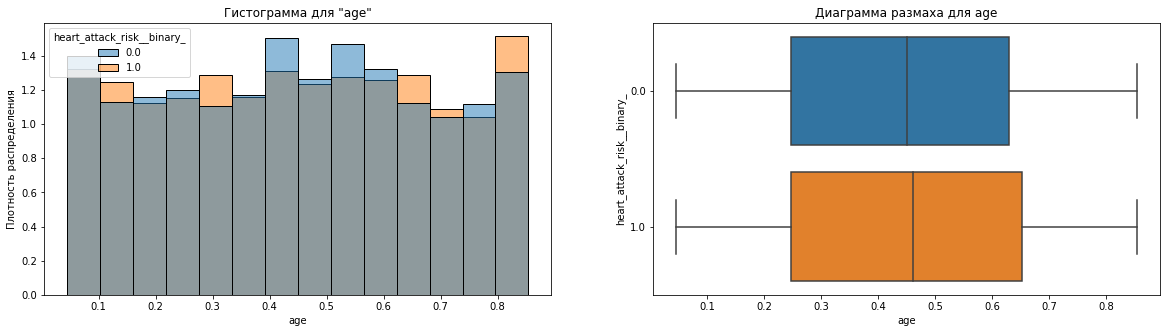

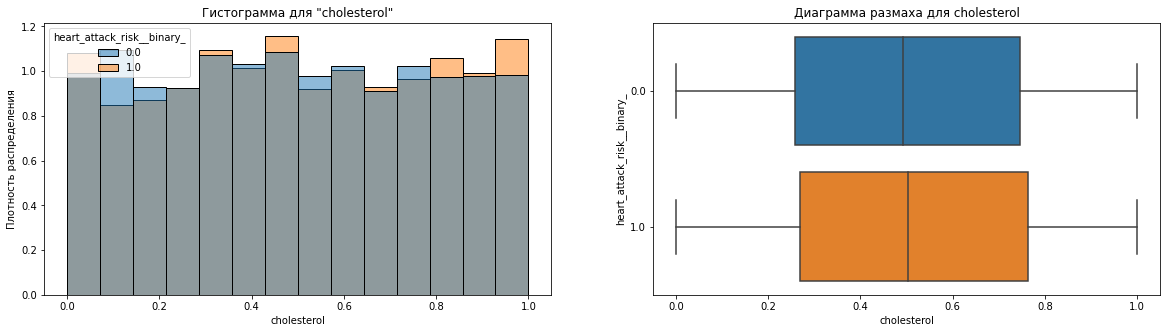

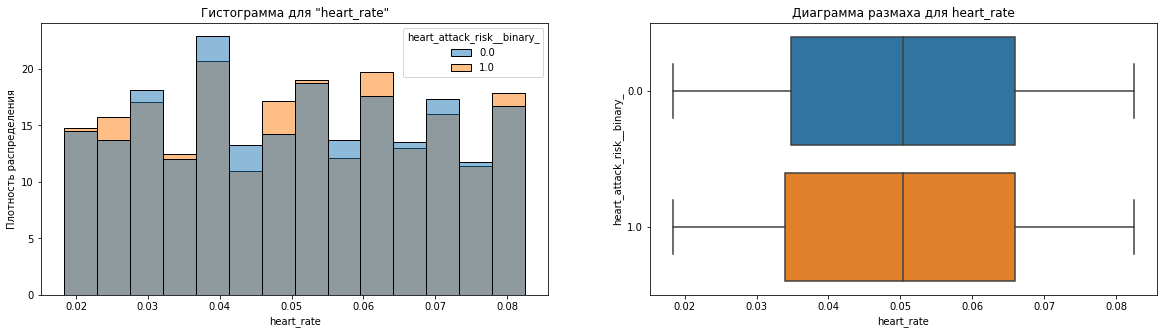

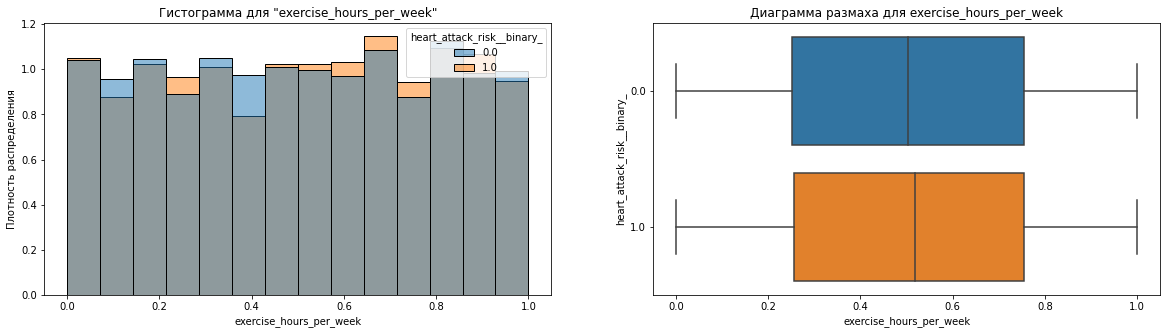

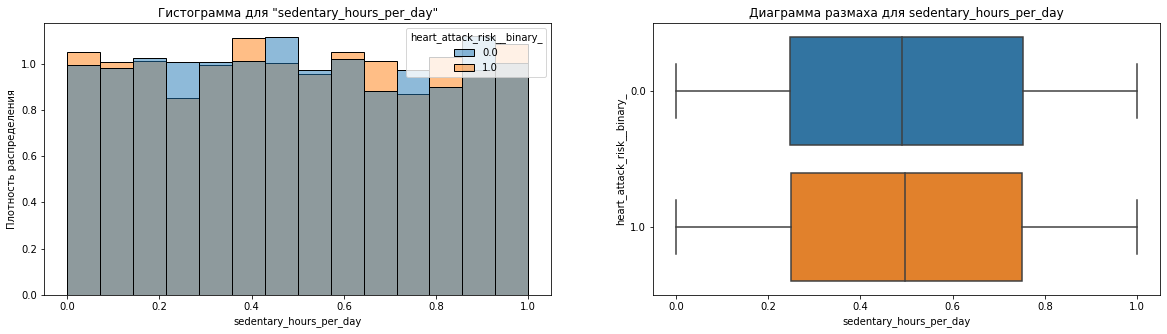

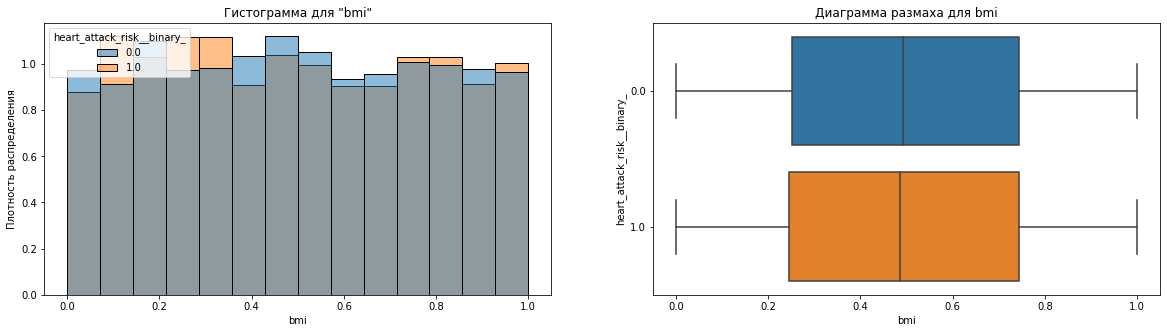

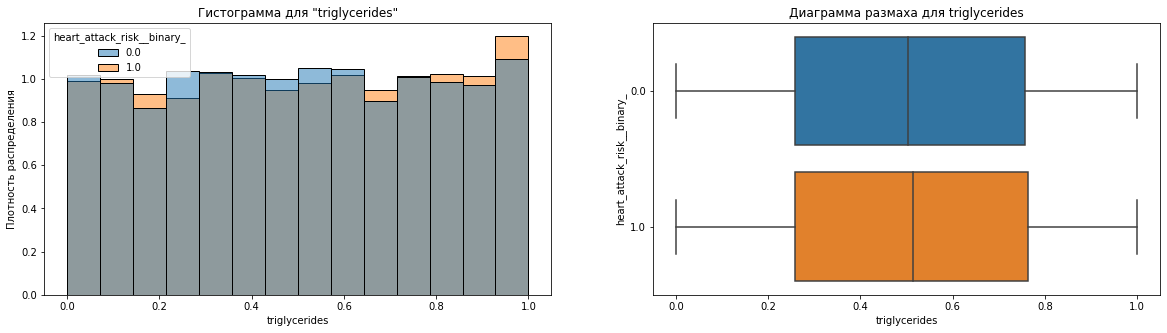

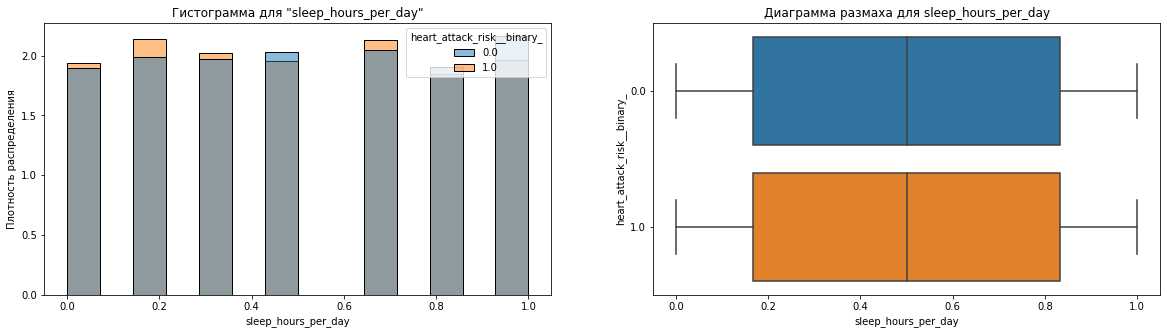

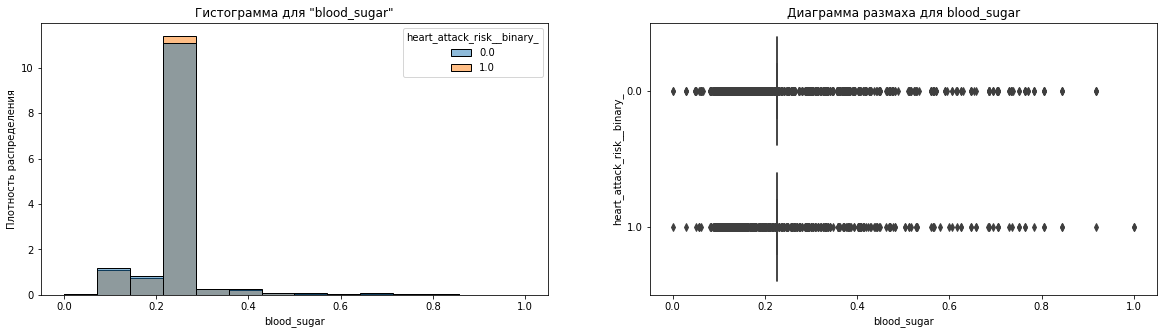

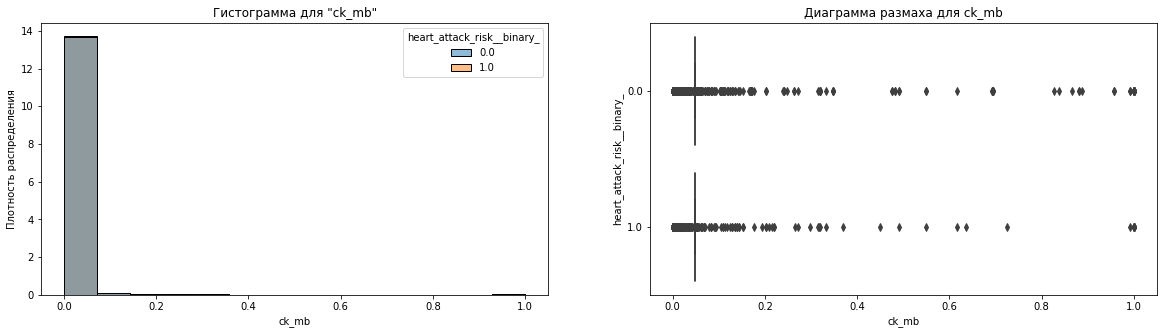

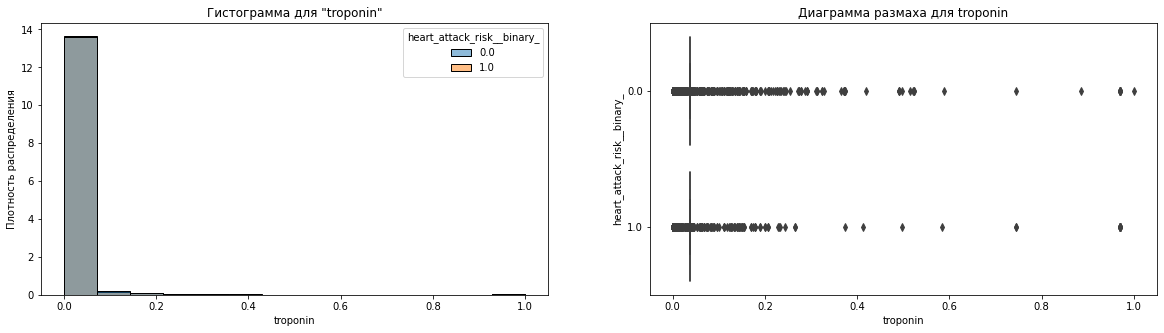

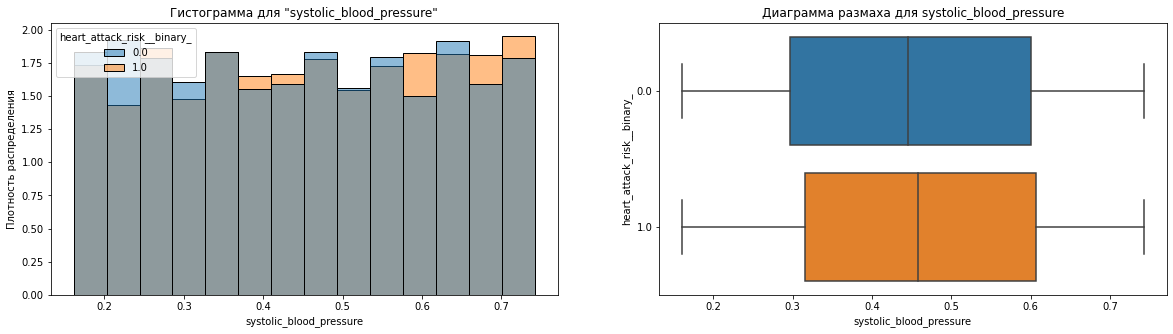

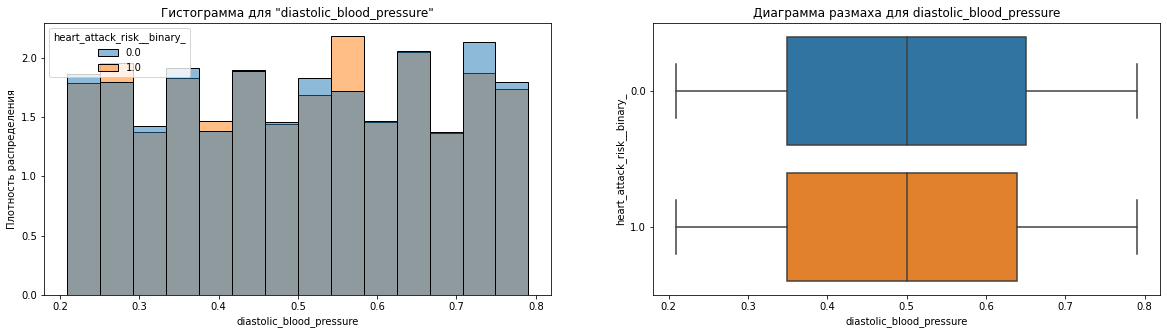

In [36]:
# построим гистограмму и диаграмму размаха для признаков датафрейма
for feature in num_col_heart:
    density_and_box_cat(heart_train, feature, 'heart_attack_risk__binary_')

In [37]:
heart_train.sort_values(by='sleep_hours_per_day')['sleep_hours_per_day'].unique()

array([0.        , 0.16666667, 0.33333333, 0.5       , 0.66666667,
       0.83333333, 1.        ])

При анализе гистограмм можно заметить, что для признак `sleep_hours_per_day` имеет, скорее, распределение категориального признака, пусть и представленного уже в численном виде. Учтем это далее при подготовке данных для машинного обучения

In [38]:
# исключим признак 'sleep_hours_per_day' из списка с количественными признаками
num_col_heart.remove('sleep_hours_per_day')
num_col_heart

['age',
 'cholesterol',
 'heart_rate',
 'exercise_hours_per_week',
 'sedentary_hours_per_day',
 'bmi',
 'triglycerides',
 'blood_sugar',
 'ck_mb',
 'troponin',
 'systolic_blood_pressure',
 'diastolic_blood_pressure']

___
Для проверки нормальности распределения признаков мы вычислим критерии Шапиро — Уилка. Он нужен, чтобы оценивать нормальность распределения с помощью статистического показателя, а не графика. 

Нулевая гипотеза в критерии Шапиро — Уилка: переменная распределена нормально. Если мы получаем значение `p-value` больше 0.05, то мы не можем отклонить нулевую гипотезу. 
Альтернативная гипотеза: Если мы получаем значение `p-value` меньше 0.05, то данные не имеют нормального распределения.
___

In [39]:
# выполним тест Шапиро-Уилка на нормальность распределения данных для для количественных признаков
for feature in num_col_heart:
    print(f'Результат выполнения теста Шапиро-Уилка на нормальность распределения данных для {feature}:\n', 
          shapiro(heart_train[f'{feature}']))
    print('----------------------------------------------------------------------------------------------')

Результат выполнения теста Шапиро-Уилка на нормальность распределения данных для age:
 ShapiroResult(statistic=0.9598994851112366, pvalue=3.7274539151040134e-43)
----------------------------------------------------------------------------------------------
Результат выполнения теста Шапиро-Уилка на нормальность распределения данных для cholesterol:
 ShapiroResult(statistic=0.9562593102455139, pvalue=1.5414283107572988e-44)
----------------------------------------------------------------------------------------------
Результат выполнения теста Шапиро-Уилка на нормальность распределения данных для heart_rate:
 ShapiroResult(statistic=0.9588574767112732, pvalue=1.4433374182545616e-43)
----------------------------------------------------------------------------------------------
Результат выполнения теста Шапиро-Уилка на нормальность распределения данных для exercise_hours_per_week:
 ShapiroResult(statistic=0.9545672535896301, pvalue=4.203895392974451e-45)
---------------------------------

/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [40]:
heart_train_high_border_box, heart_train_low_border_box, heart_train_filtered, heart_train_outliers = border_box(heart_train, 'blood_sugar')

верхняя граница (high_border_box):  0.2270175751137986
нижняя граница (low_border_box):  0.2270175751137986
Количество строк датафрейма, которые попали за границы диаграммы размаха:  1891
Доля строк датафрейма, которые попали за границы диаграммы размаха:  22.39990523572613 %


In [41]:
heart_train_high_border_box, heart_train_low_border_box, heart_train_filtered, heart_train_outliers = border_box(heart_train, 'ck_mb')

верхняя граница (high_border_box):  0.0482287853675997
нижняя граница (low_border_box):  0.0482287853675997
Количество строк датафрейма, которые попали за границы диаграммы размаха:  1891
Доля строк датафрейма, которые попали за границы диаграммы размаха:  22.39990523572613 %


In [42]:
heart_train_high_border_box, heart_train_low_border_box, heart_train_filtered, heart_train_outliers = border_box(heart_train, 'troponin')

верхняя граница (high_border_box):  0.0365123661820742
нижняя граница (low_border_box):  0.0365123661820742
Количество строк датафрейма, которые попали за границы диаграммы размаха:  1891
Доля строк датафрейма, которые попали за границы диаграммы размаха:  22.39990523572613 %


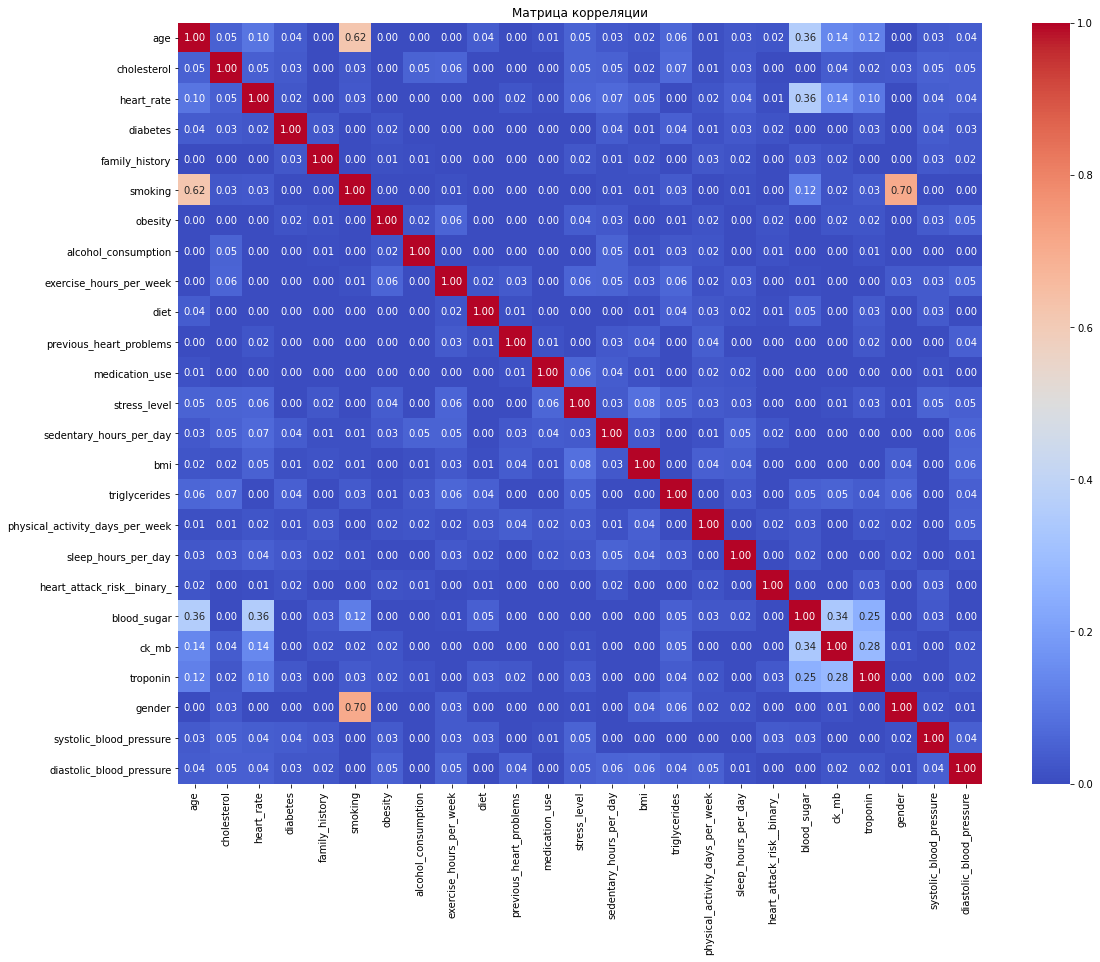

In [43]:
# Рассчитаем коэффициенты коррелиции Фи
# Вызовем метод 'phik_matrix', чтобы построить матрицу корреляций для входных признаков в датасете
# Выведем матрицу корреляций в виде тепловой карты
plt.figure(figsize=(18, 14))
sns.heatmap(heart_train.drop('id', axis=1).phik_matrix(interval_cols=num_col_heart), 
            annot=True, 
            fmt='.2f', 
            cmap="coolwarm") 
plt.title("Матрица корреляции")
plt.show()

In [44]:
# оценим степень мультиколлинеарности между ними с помощью Variance Inflation Factor (VIF)
# Как правило, значение VIF выше 5 требует внимания, а выше 10 — серьезного рассмотрения изменений в модели 

# добавление константы
VIFs_df = add_constant(heart_train[num_col_heart])

# расчет VIF для каждого количественного признака
# VIF - Коэффициент инфляции дисперсии
VIFs = pd.DataFrame()
VIFs['Feature'] = VIFs_df.columns
VIFs['VIF'] = [variance_inflation_factor(VIFs_df.values, i) for i in range(VIFs_df.shape[1])]
display(VIFs.sort_values(by='VIF',ascending=False))

,Feature,VIF
0,const,51.774879
10,troponin,1.003757
8,blood_sugar,1.002845
2,cholesterol,1.002462
5,sedentary_hours_per_day,1.002384
4,exercise_hours_per_week,1.001876
12,diastolic_blood_pressure,1.001836
1,age,1.001802
3,heart_rate,1.001432
11,systolic_blood_pressure,1.001105


In [45]:
# создадим функцию для построения диаграмм для категориальных признаков
def barh_and_pie(df, feature, agg_column):
    """
    Функция строит столбчатую и круговую диаграммы для абсолютных и относительных значений категориальных признаков 
    (распределение)

    Args:
        df (pd.DataFrame): датафрейм
        feature: категориальный признак
        agg_column: признак для агрегации (подсчета количества)

    Returns:
        None    
    """
    plt.figure(figsize=(20, 7))
    
    plt.subplot(1, 2, 1)
    plt.barh(df.pivot_table(index=f'{feature}', values=agg_column, aggfunc='count').index, 
             df.pivot_table(index=f'{feature}', values=agg_column, aggfunc='count')[agg_column])
    plt.xlabel(f'Частота признака {feature}')
    plt.title(f'Распределение для признака - "{feature}"')
    plt.grid(linestyle='--', alpha=0.5)
    

    plt.subplot(1, 2, 2)
    plt.pie(df.pivot_table(index=f'{feature}', values=agg_column, aggfunc='count')[agg_column],
            labels=df.pivot_table(index=f'{feature}', values=agg_column, aggfunc='count').index, 
            autopct='%1.1f%%') 

    plt.show()

In [46]:
#создадим список категориальных признаков 
cat_col_heart = ['diabetes', 
                 'family_history', 
                 'smoking', 
                 'obesity', 
                 'alcohol_consumption', 
                 'diet', 
                 'previous_heart_problems', 
                 'medication_use', 
                 'stress_level', 
                 'physical_activity_days_per_week', 
                 'sleep_hours_per_day', 
                 'heart_attack_risk__binary_', 
                 'gender']

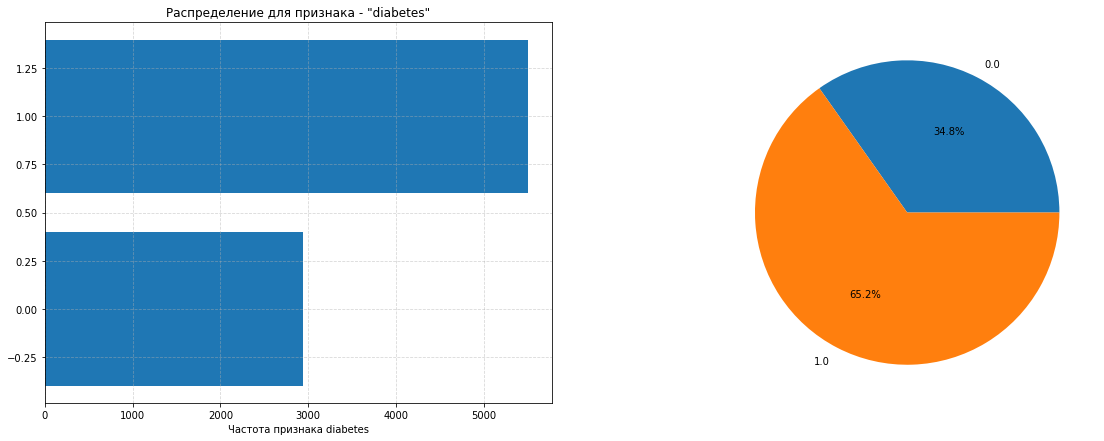

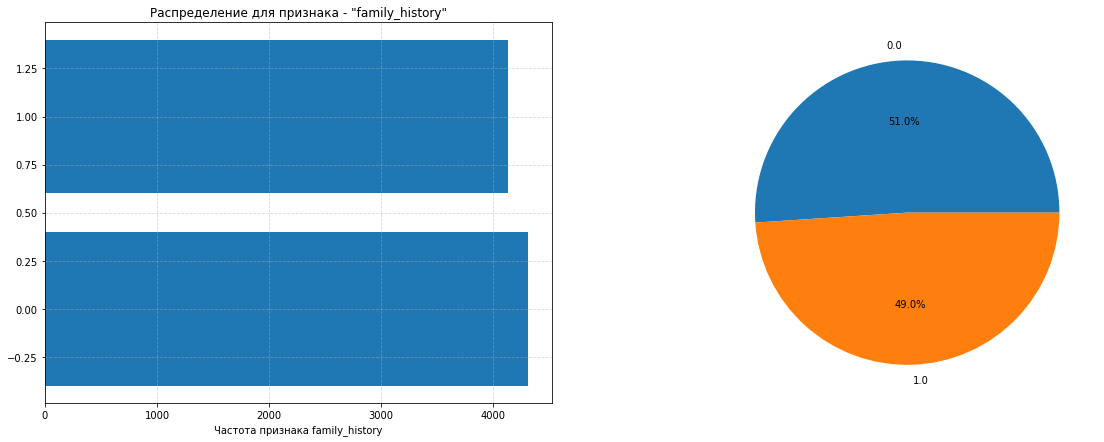

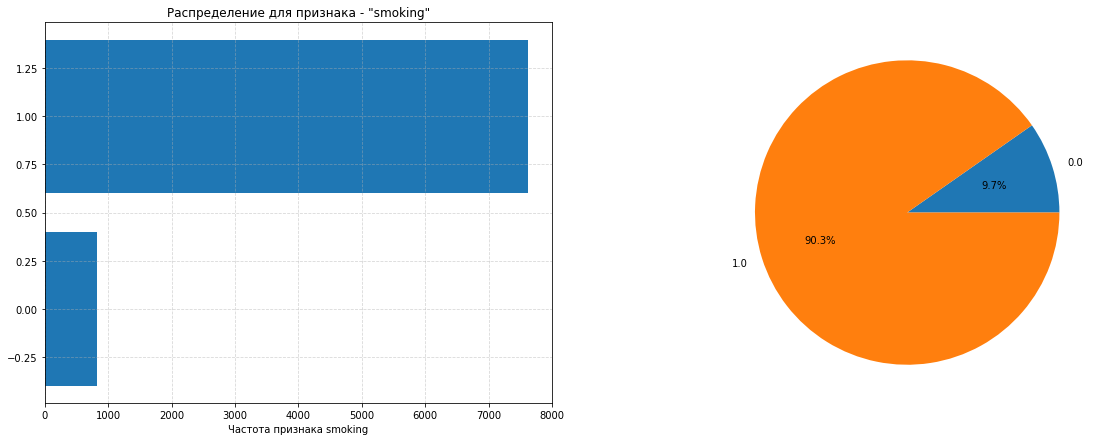

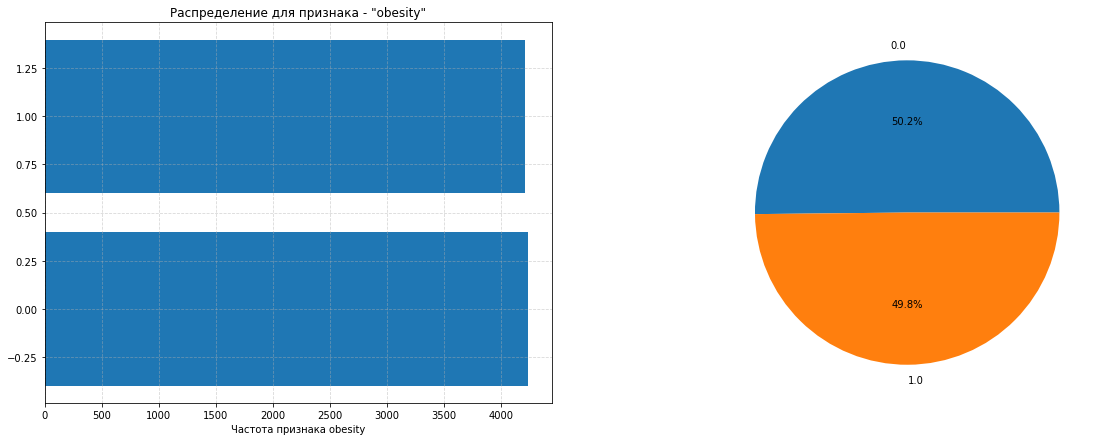

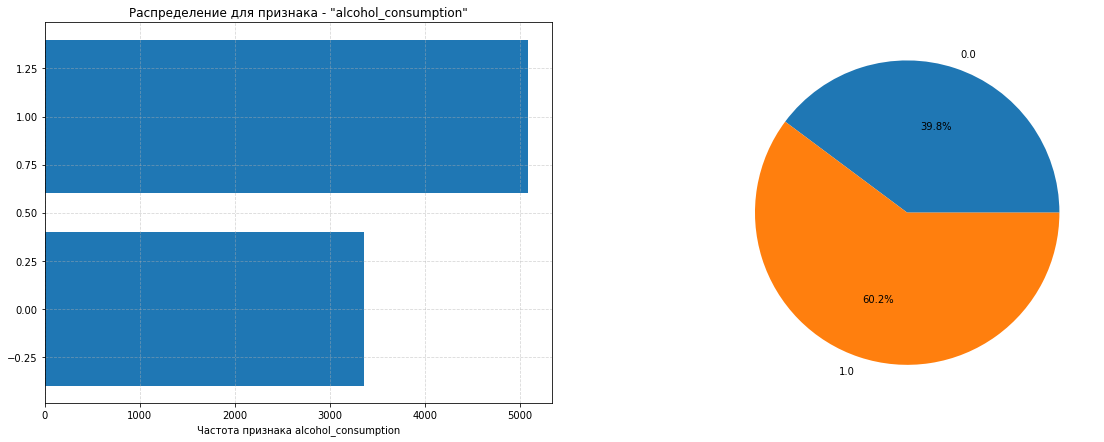

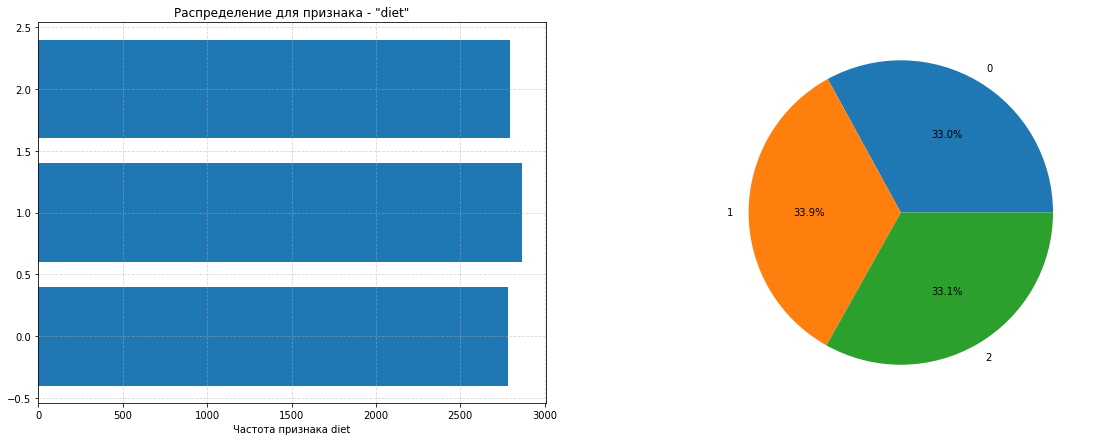

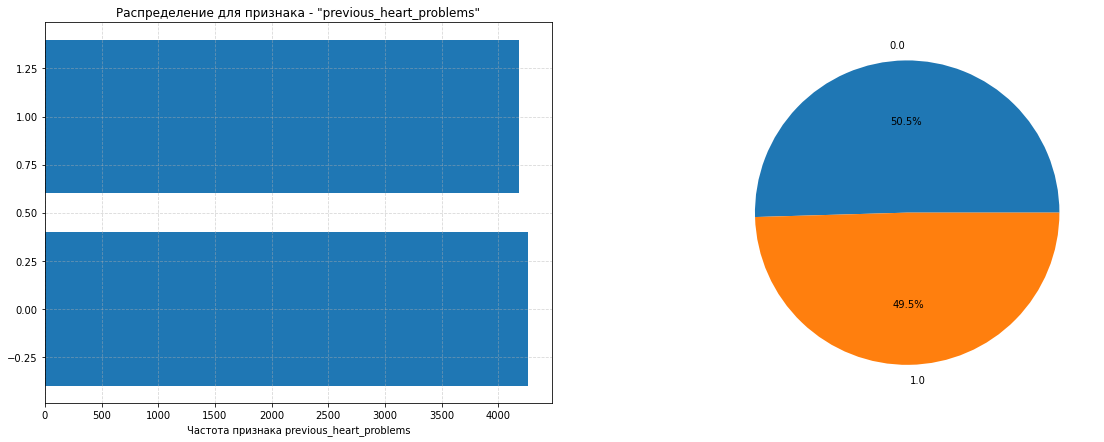

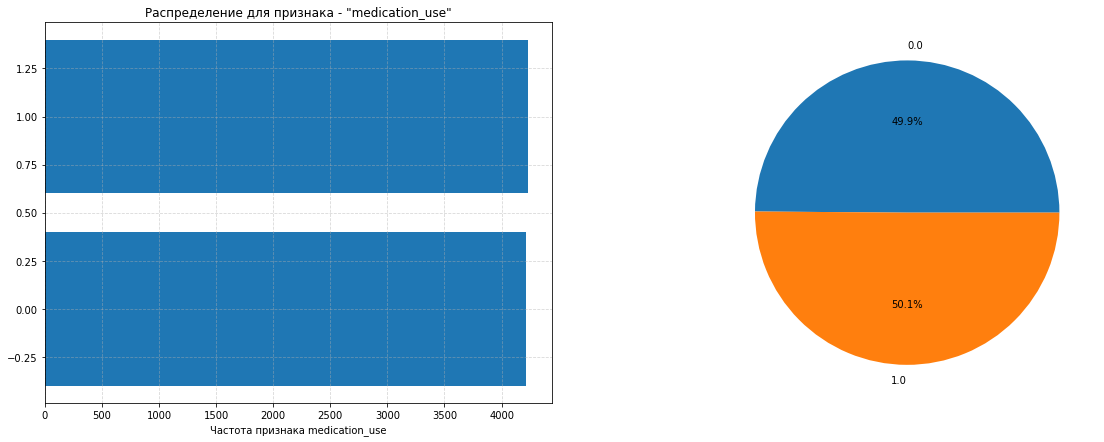

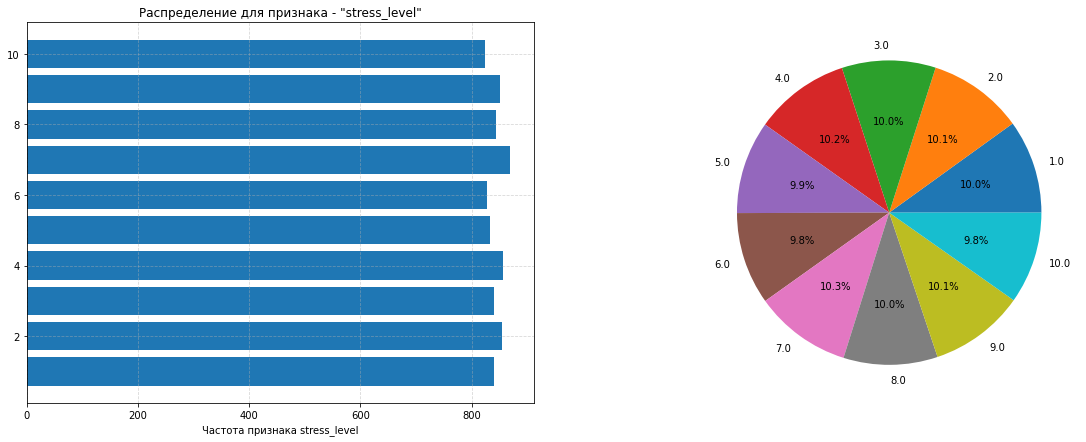

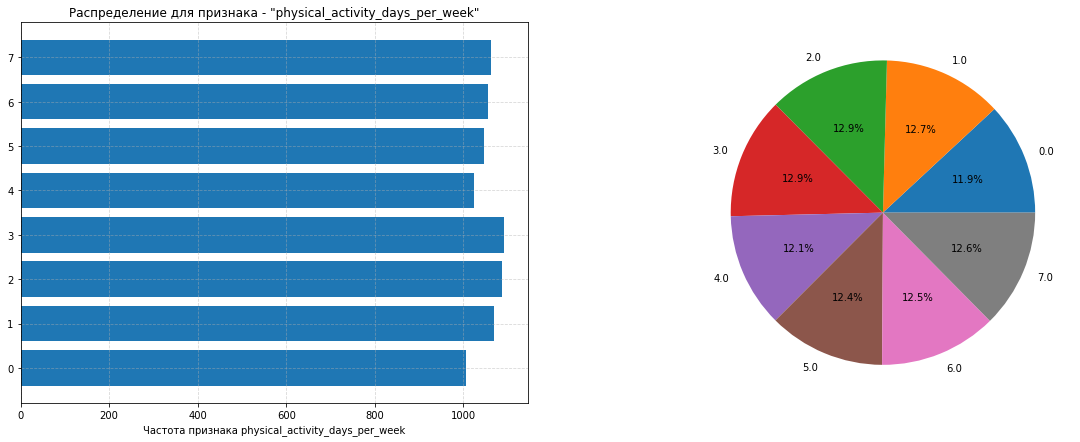

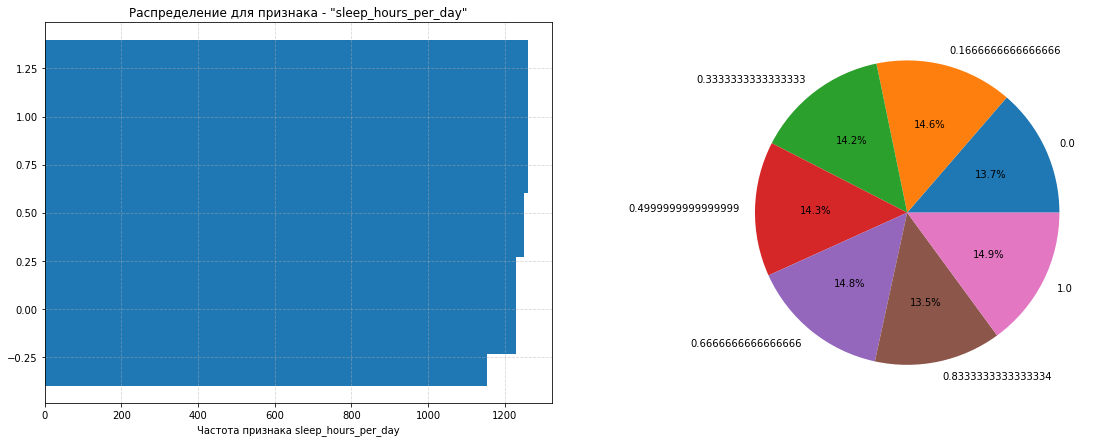

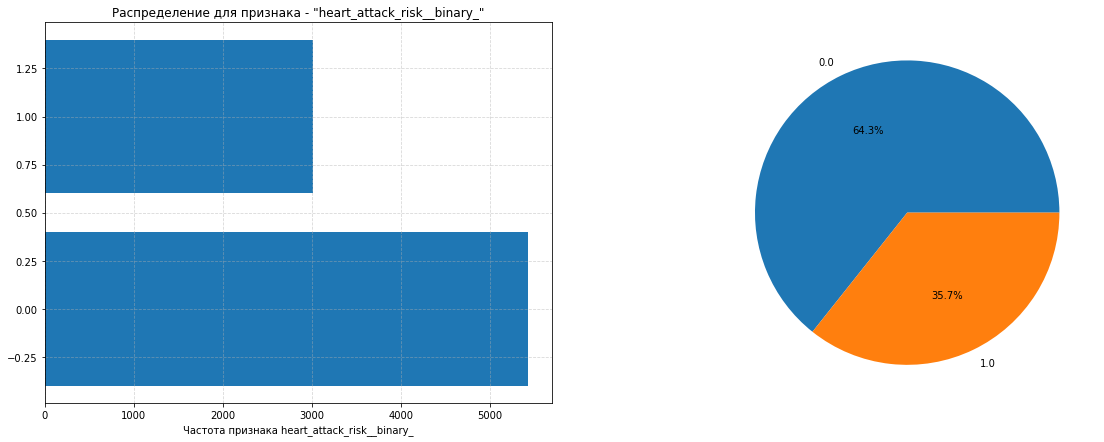

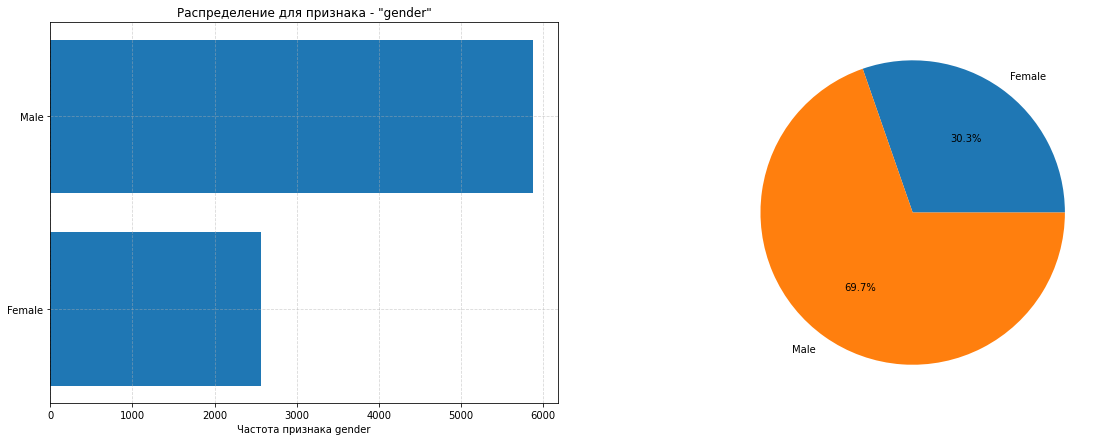

In [47]:
# построим диаграммы для категориальных признаков датафрейма
for feature in cat_col_heart:
    barh_and_pie(heart_train, feature, 'id')

In [48]:
# создадим функцию для построения диаграмм для категориальных признаков с учетом таргета
def pie_target(df, feature, agg_column):
    """
    Функция строит круговую диаграммы с указанием относительных значений категориальных признаков с учетом целевого
    (распределение)

    Args:
        df (pd.DataFrame): датафрейм
        feature: категориальный признак
        agg_column: признак для агрегации (подсчета количества)

    Returns:
        None    
    """
    plt.figure(figsize=(20, 5))
    
    plt.subplot(1, 2, 1)
    plt.title(f'Распределение для признака - "{feature}"\n Риск сердечного приступа - низкий')
    plt.pie(df.query('heart_attack_risk__binary_ == 0')
            .pivot_table(index=f'{feature}', 
                         values=agg_column, 
                         aggfunc='count')[agg_column],
            labels=df.pivot_table(index=f'{feature}', 
                                  values=agg_column, 
                                  aggfunc='count').index, 
            startangle=90,
            autopct='%1.1f%%') 

    plt.subplot(1, 2, 2)
    plt.title(f'Распределение для признака - "{feature}"\n Риск сердечного приступа - высокий')
    plt.pie(df.query('heart_attack_risk__binary_ == 1')
            .pivot_table(index=f'{feature}', 
                         values=agg_column, 
                         aggfunc='count')[agg_column],
            labels=df.pivot_table(index=f'{feature}', 
                                  values=agg_column, 
                                  aggfunc='count').index, 
            startangle=90,
            autopct='%1.1f%%') 

    plt.show()

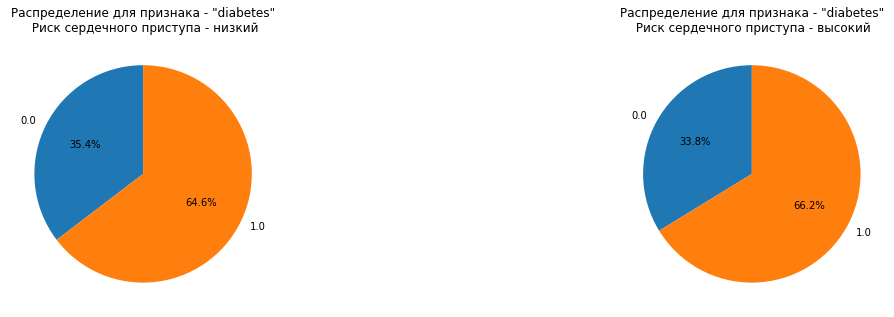

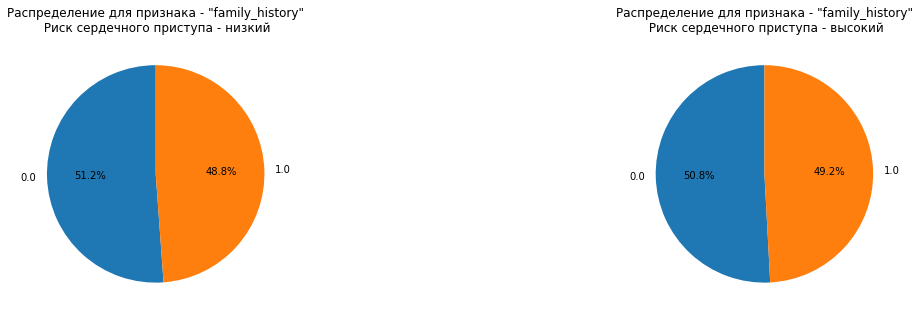

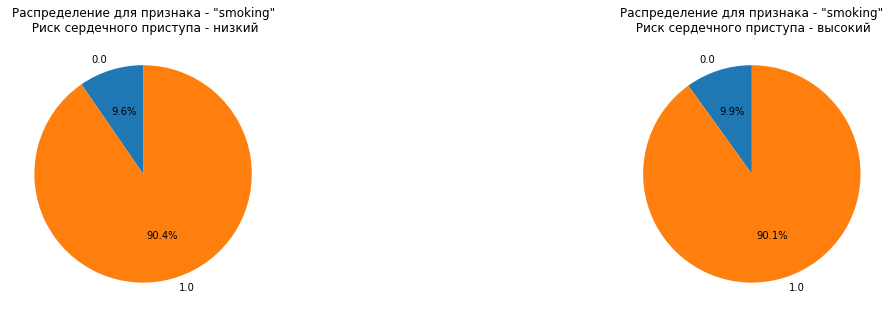

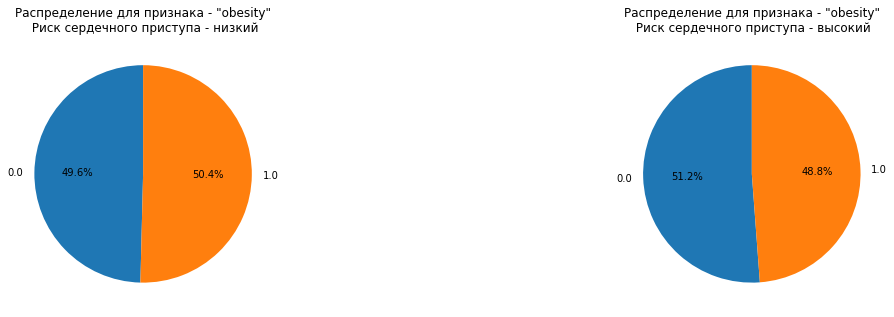

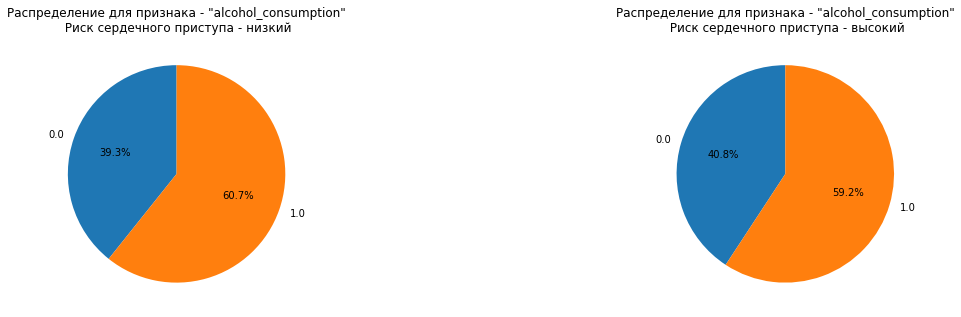

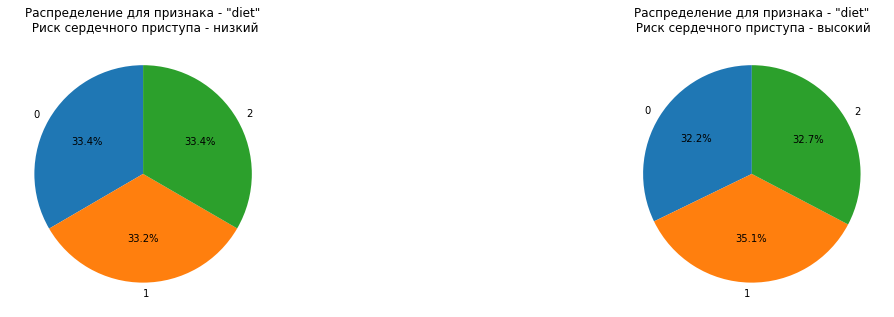

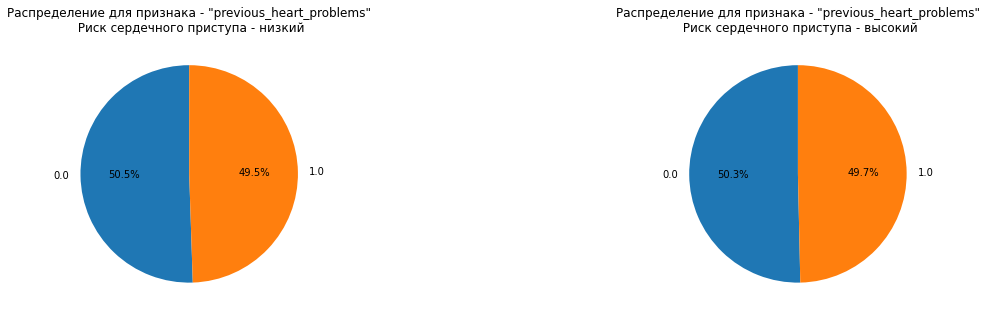

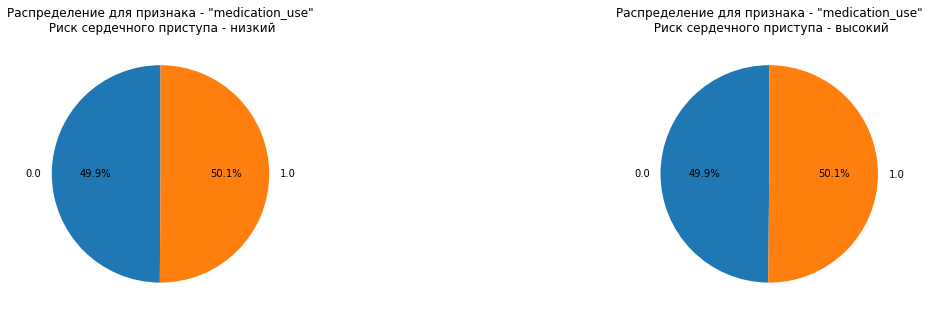

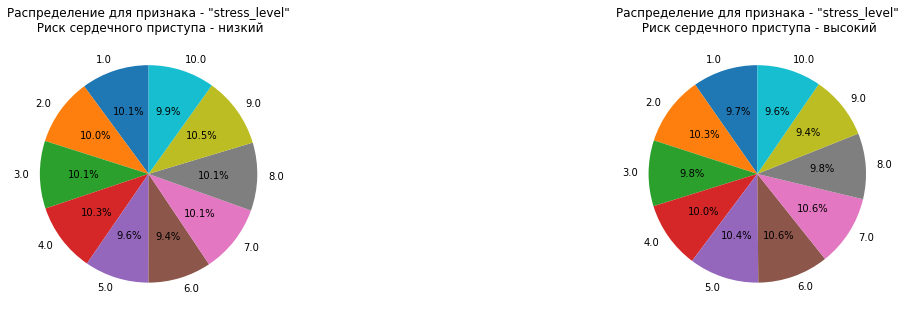

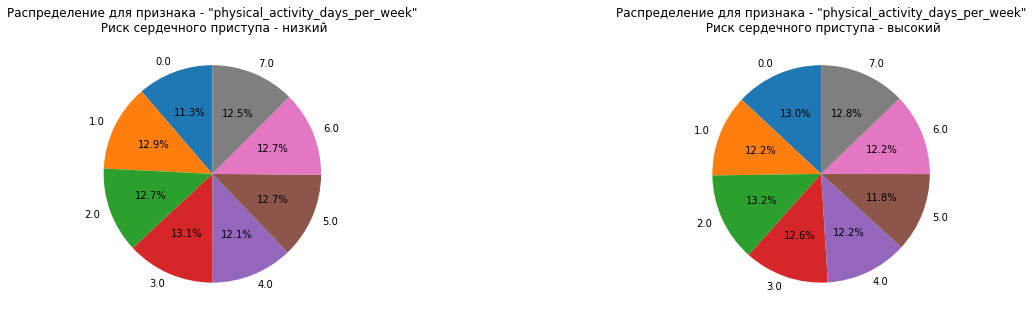

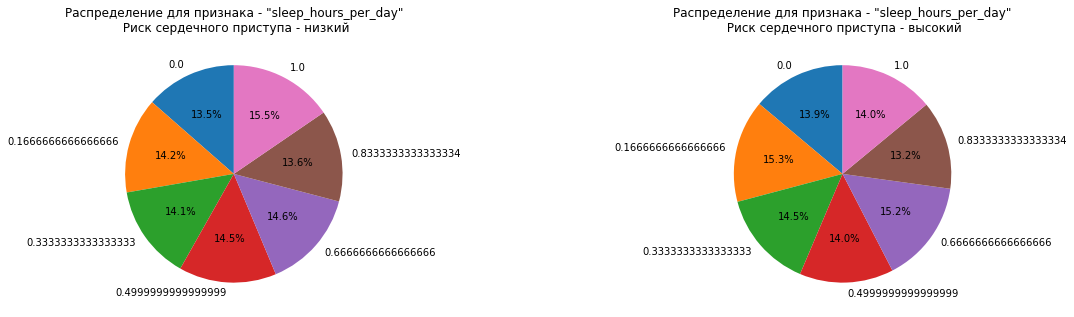

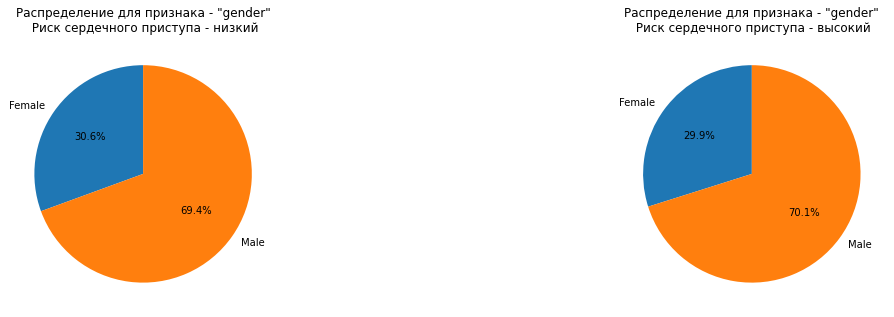

In [49]:
# построим диаграммы для категориальных признаков с учетом таргета
# для начала, создадим список категориальных признаков, где отфильтруем целевой
cat_col_heart_no_target = [x for x in cat_col_heart if x != 'heart_attack_risk__binary_']
for feature in cat_col_heart_no_target:
    pie_target(heart_train, feature, 'id')

####  **heart_test**

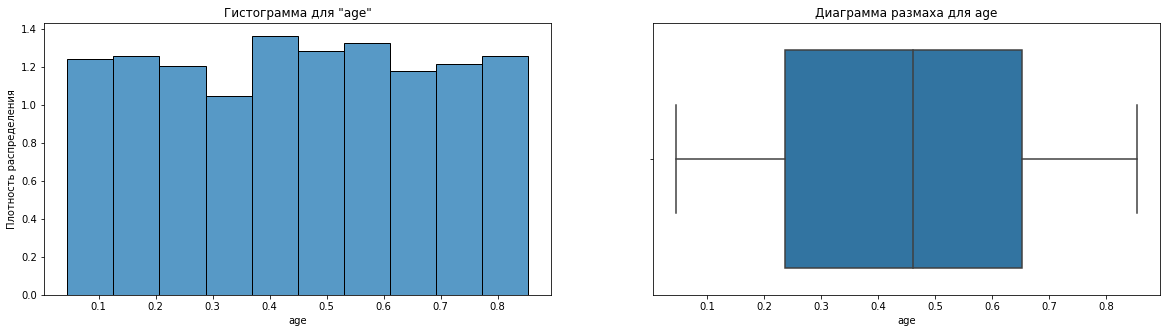

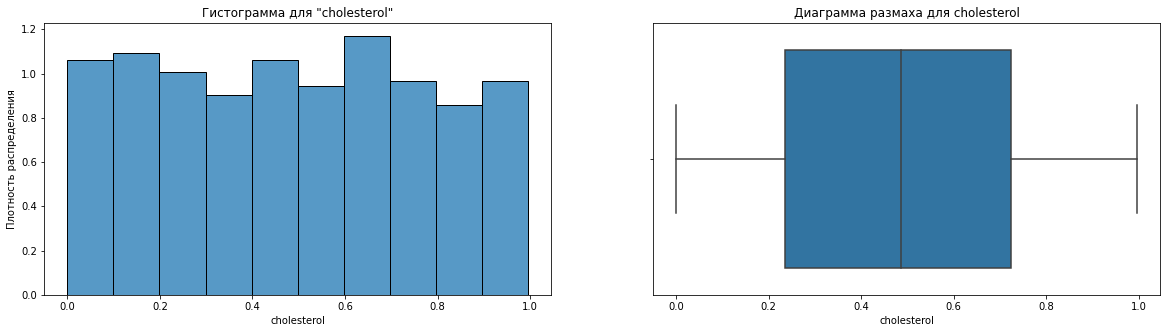

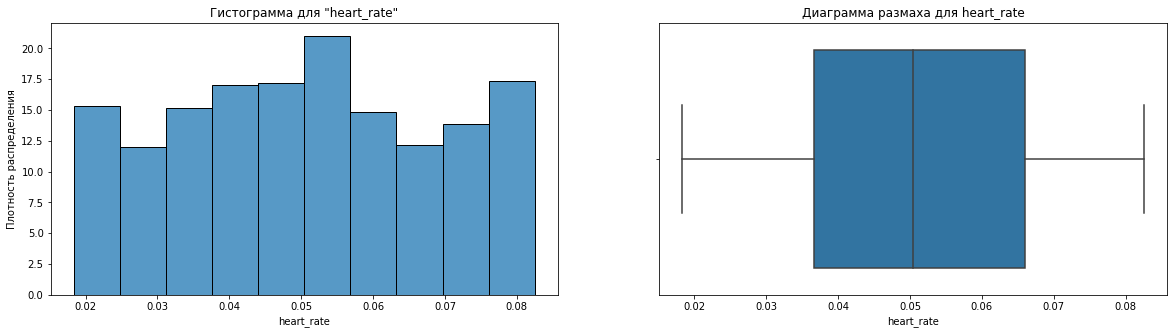

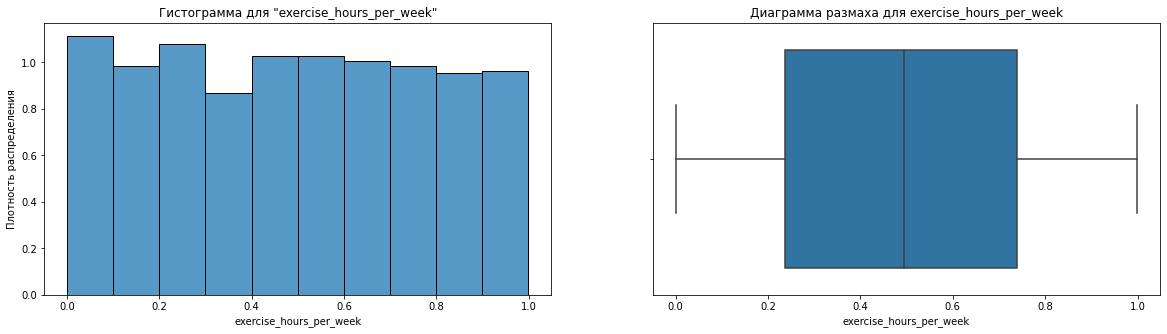

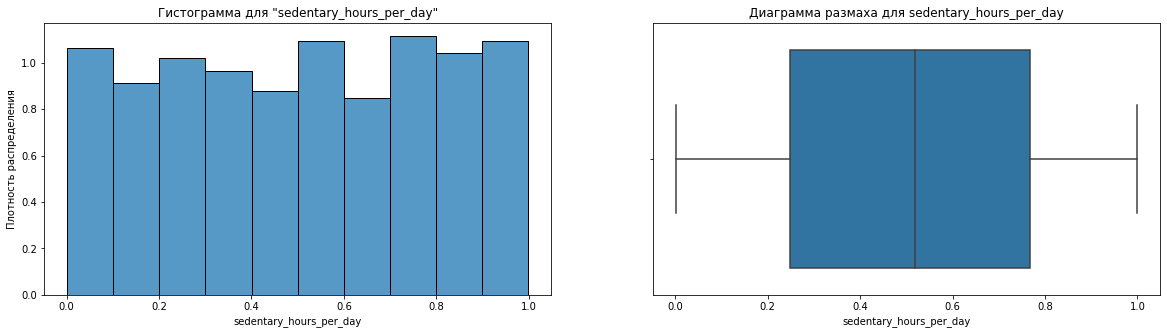

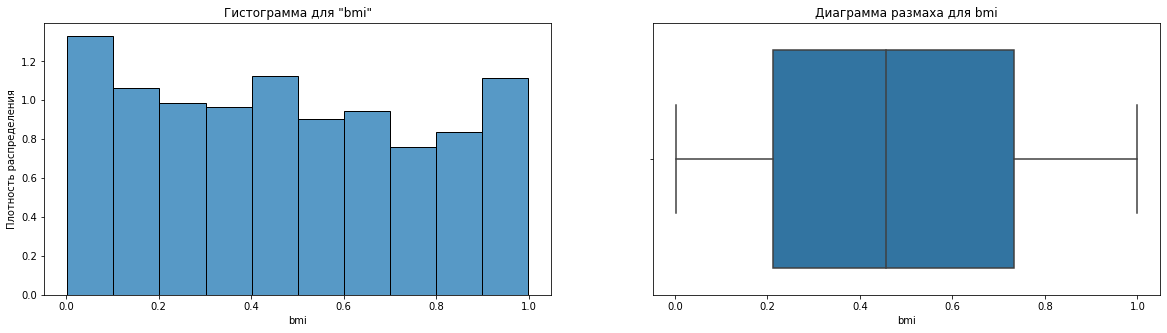

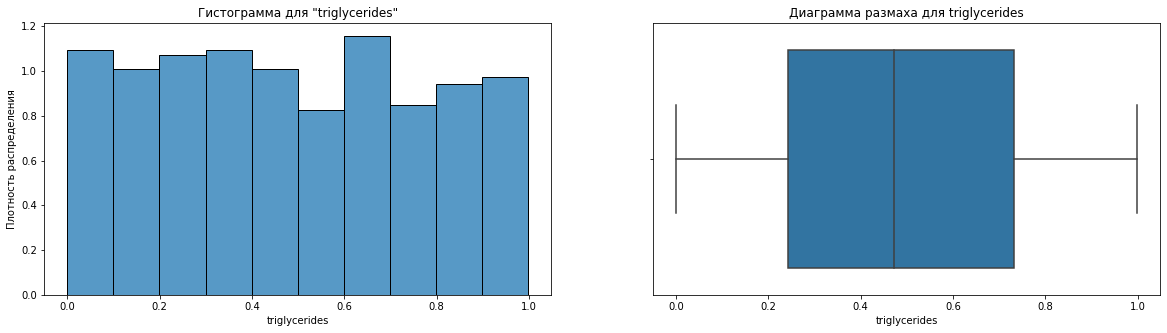

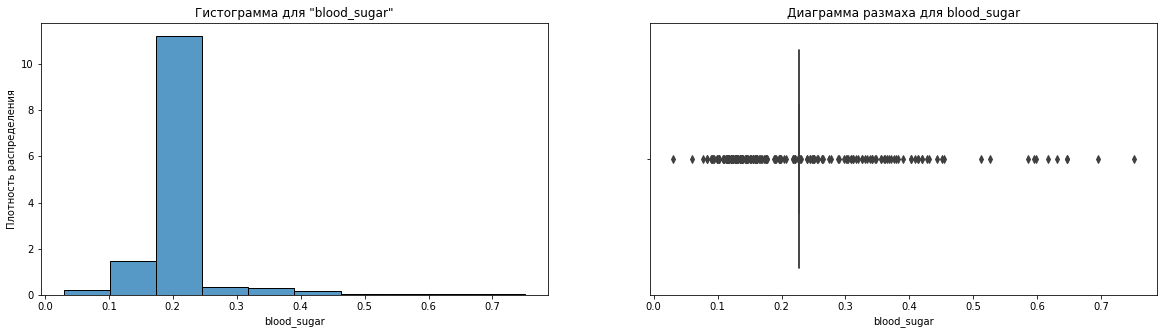

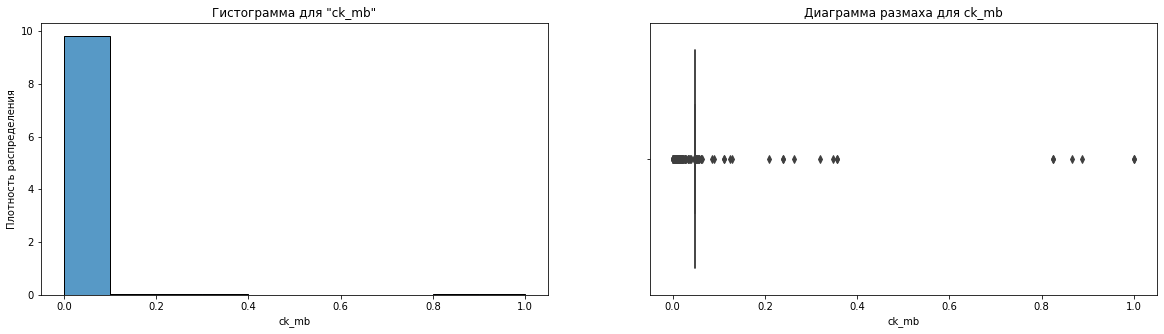

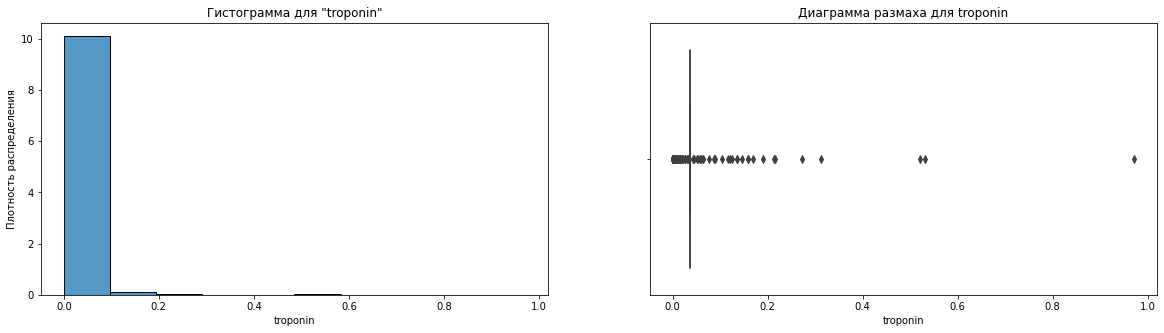

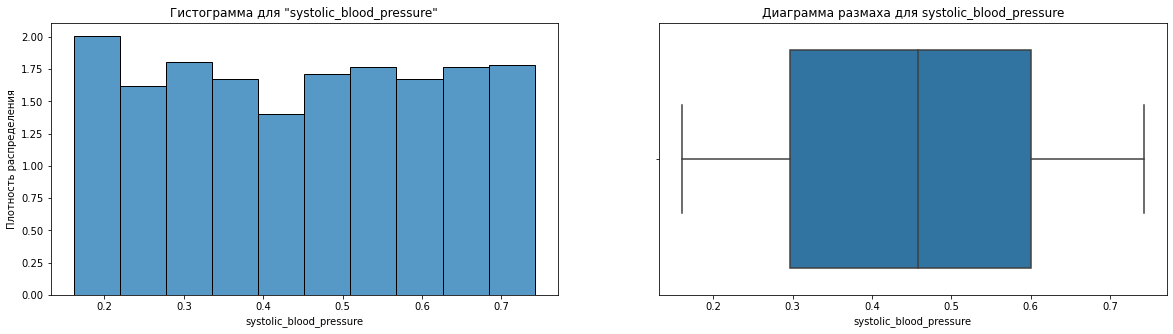

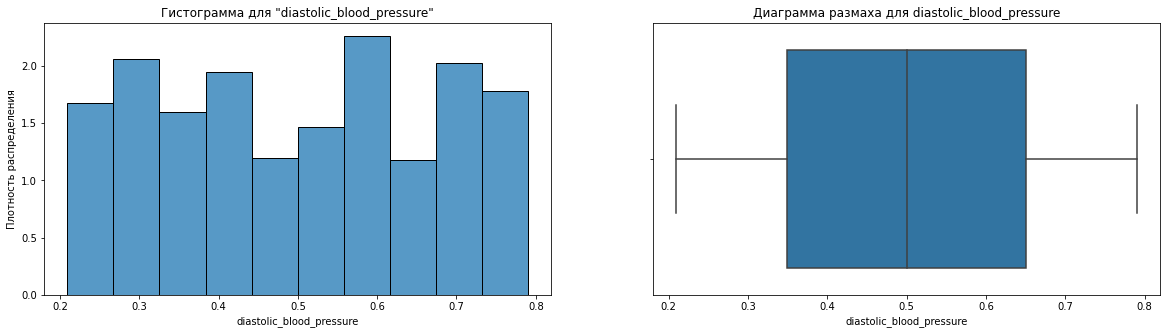

In [50]:
# построим гистограмму и диаграмму размаха для признаков датафрейма
for feature in num_col_heart:
    density_and_box(heart_test, feature)

In [51]:
heart_train_high_border_box, heart_train_low_border_box, heart_train_filtered, heart_train_outliers = border_box(heart_test, 'blood_sugar')

верхняя граница (high_border_box):  0.2270175751137986
нижняя граница (low_border_box):  0.2270175751137986
Количество строк датафрейма, которые попали за границы диаграммы размаха:  209
Доля строк датафрейма, которые попали за границы диаграммы размаха:  22.35294117647059 %


In [52]:
heart_train_high_border_box, heart_train_low_border_box, heart_train_filtered, heart_train_outliers = border_box(heart_test, 'ck_mb')

верхняя граница (high_border_box):  0.0482287853675997
нижняя граница (low_border_box):  0.0482287853675997
Количество строк датафрейма, которые попали за границы диаграммы размаха:  209
Доля строк датафрейма, которые попали за границы диаграммы размаха:  22.35294117647059 %


In [53]:
heart_train_high_border_box, heart_train_low_border_box, heart_train_filtered, heart_train_outliers = border_box(heart_test, 'troponin')

верхняя граница (high_border_box):  0.0365123661820742
нижняя граница (low_border_box):  0.0365123661820742
Количество строк датафрейма, которые попали за границы диаграммы размаха:  209
Доля строк датафрейма, которые попали за границы диаграммы размаха:  22.35294117647059 %


In [54]:
# выполним тест Шапиро-Уилка на нормальность распределения данных для для количественных признаков
for feature in num_col_heart:
    print(f'Результат выполнения теста Шапиро-Уилка на нормальность распределения данных для {feature}:\n', 
          shapiro(heart_test[f'{feature}']))
    print('----------------------------------------------------------------------------------------------')

Результат выполнения теста Шапиро-Уилка на нормальность распределения данных для age:
 ShapiroResult(statistic=0.9551824331283569, pvalue=2.715867414467677e-16)
----------------------------------------------------------------------------------------------
Результат выполнения теста Шапиро-Уилка на нормальность распределения данных для cholesterol:
 ShapiroResult(statistic=0.9556286931037903, pvalue=3.3267793397630003e-16)
----------------------------------------------------------------------------------------------
Результат выполнения теста Шапиро-Уилка на нормальность распределения данных для heart_rate:
 ShapiroResult(statistic=0.9643299579620361, pvalue=2.3927095114256725e-14)
----------------------------------------------------------------------------------------------
Результат выполнения теста Шапиро-Уилка на нормальность распределения данных для exercise_hours_per_week:
 ShapiroResult(statistic=0.9533425569534302, pvalue=1.1940958300155833e-16)
---------------------------------

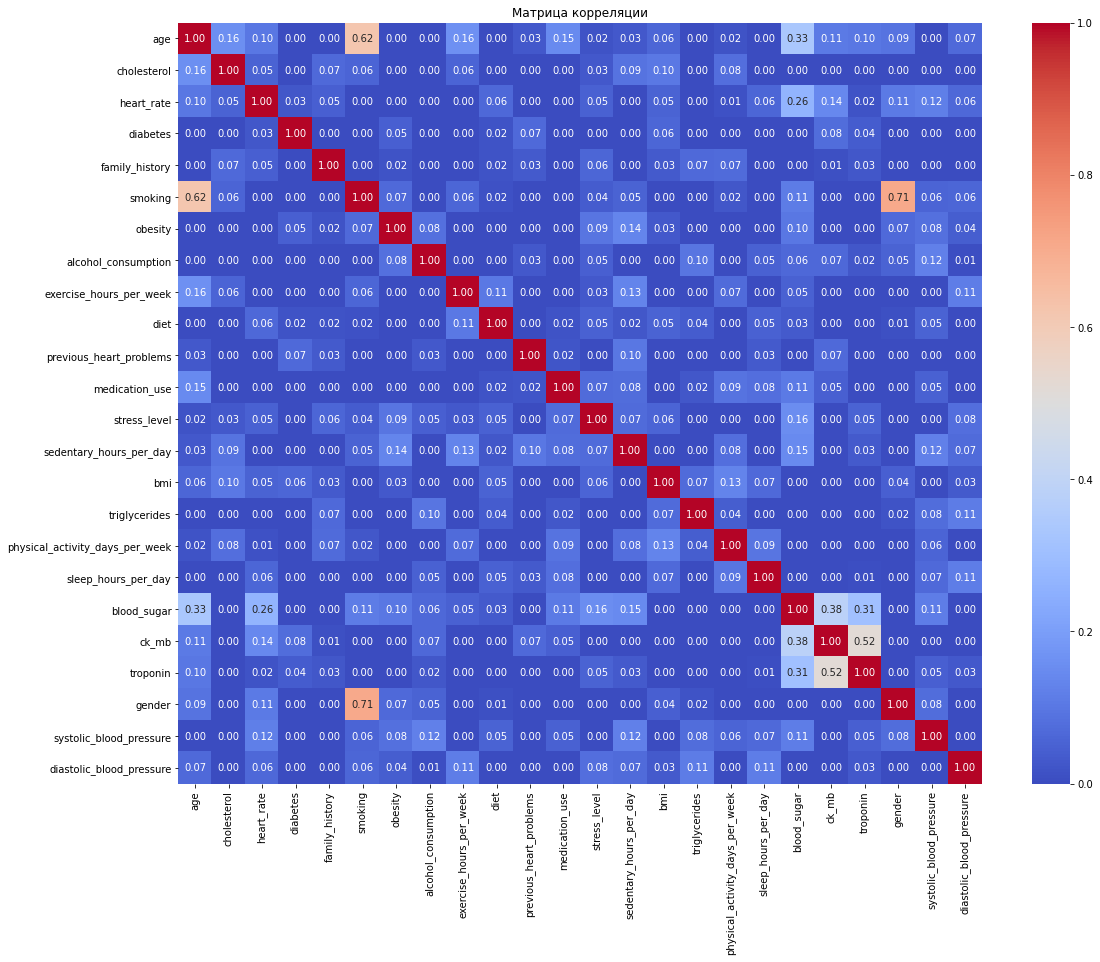

In [55]:
# Рассчитаем коэффициенты коррелиции Фи
# Вызовем метод 'phik_matrix', чтобы построить матрицу корреляций для входных признаков в датасете
# Выведем матрицу корреляций в виде тепловой карты
plt.figure(figsize=(18, 14))
sns.heatmap(heart_test.drop('id', axis=1).phik_matrix(interval_cols=num_col_heart), 
            annot=True, 
            fmt='.2f', 
            cmap="coolwarm") 
plt.title("Матрица корреляции")
plt.show()

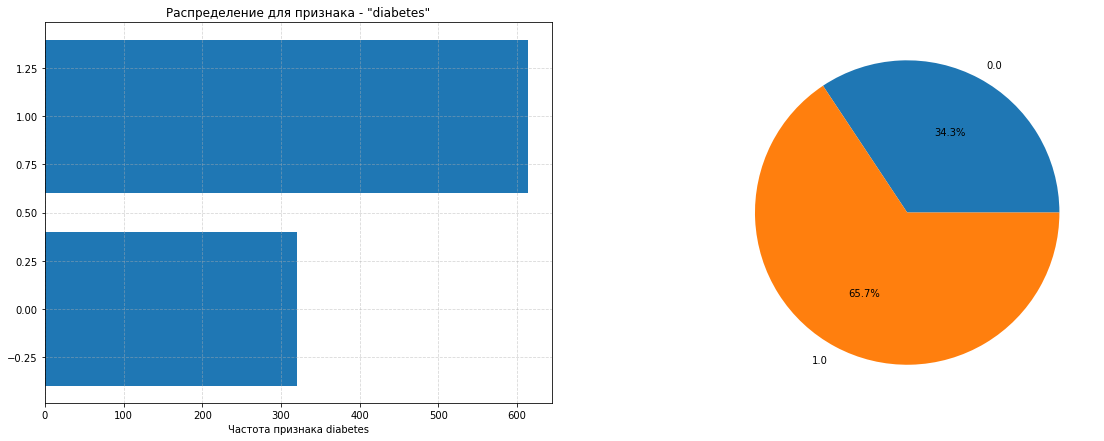

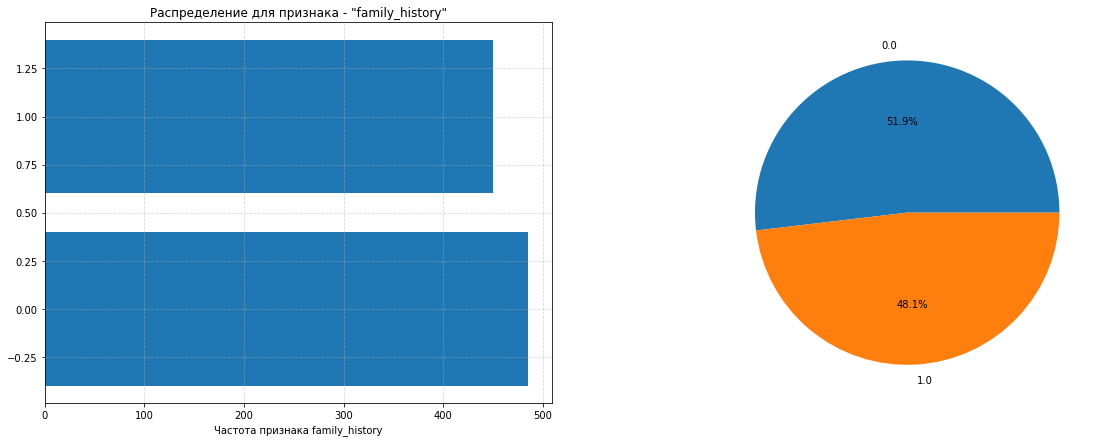

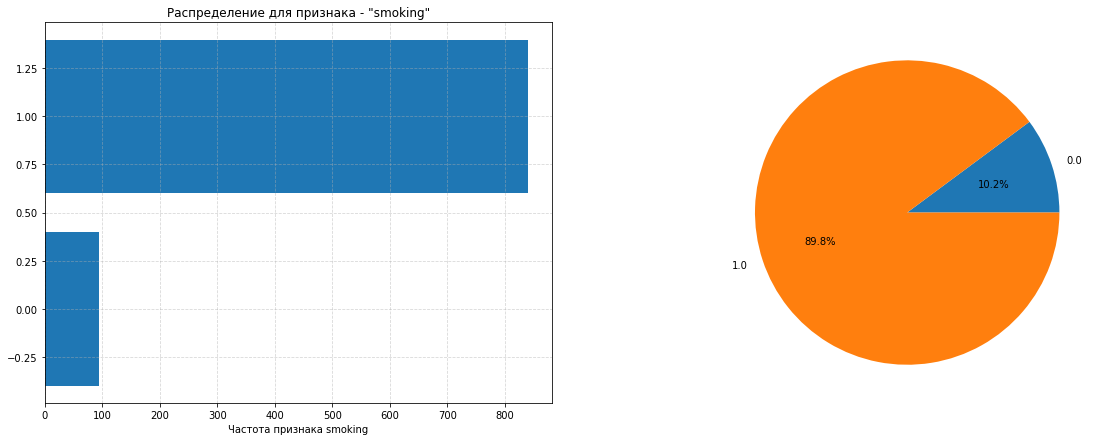

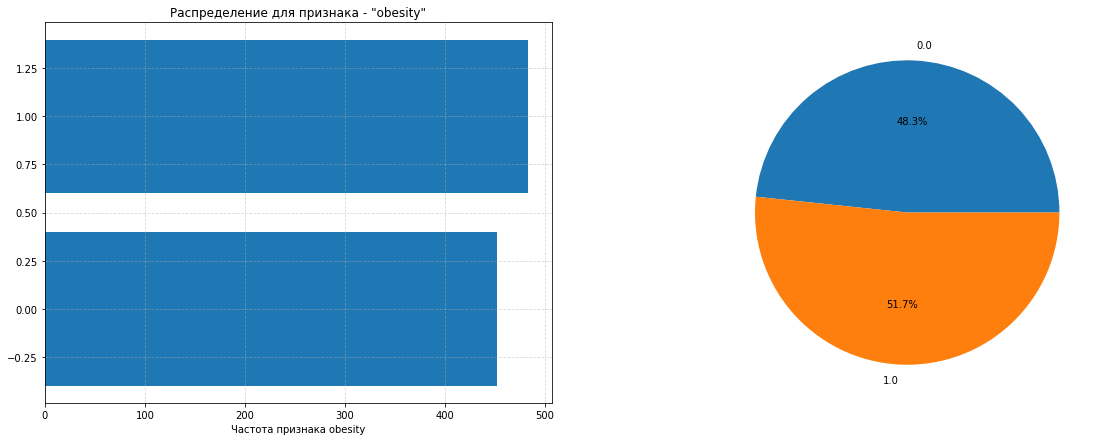

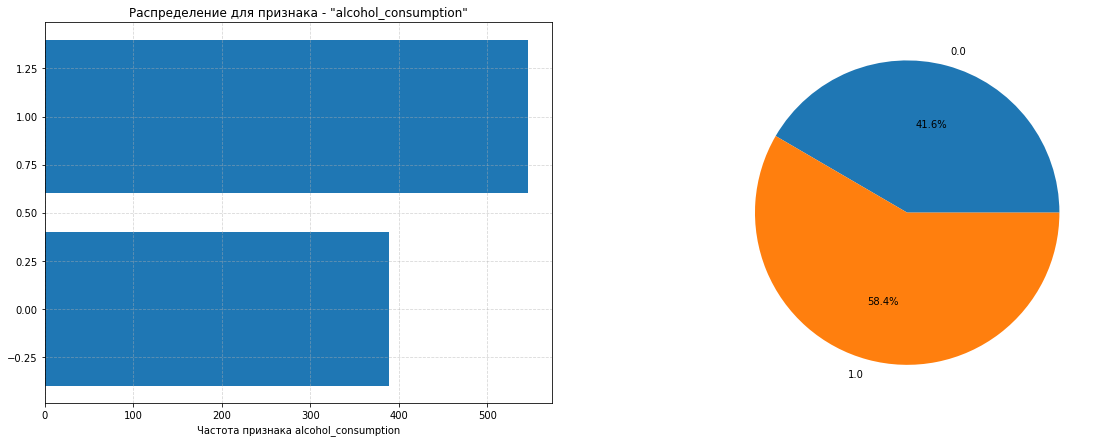

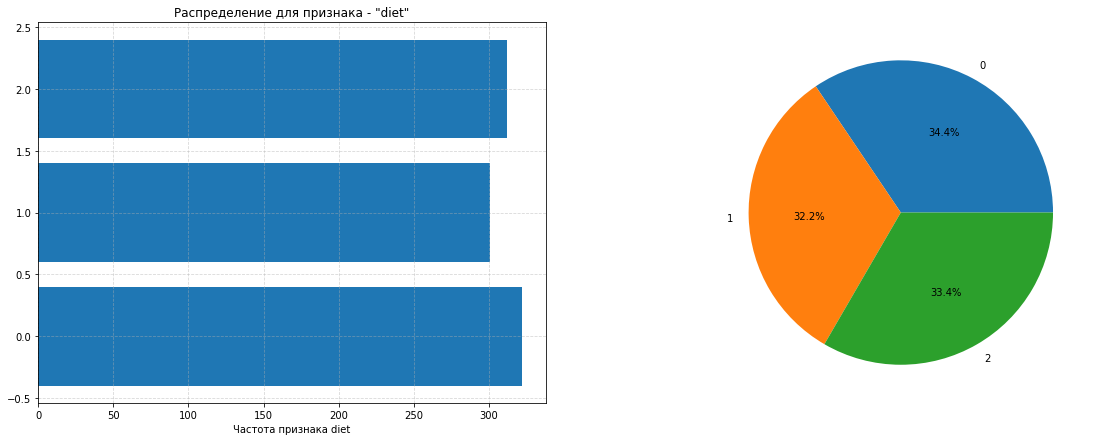

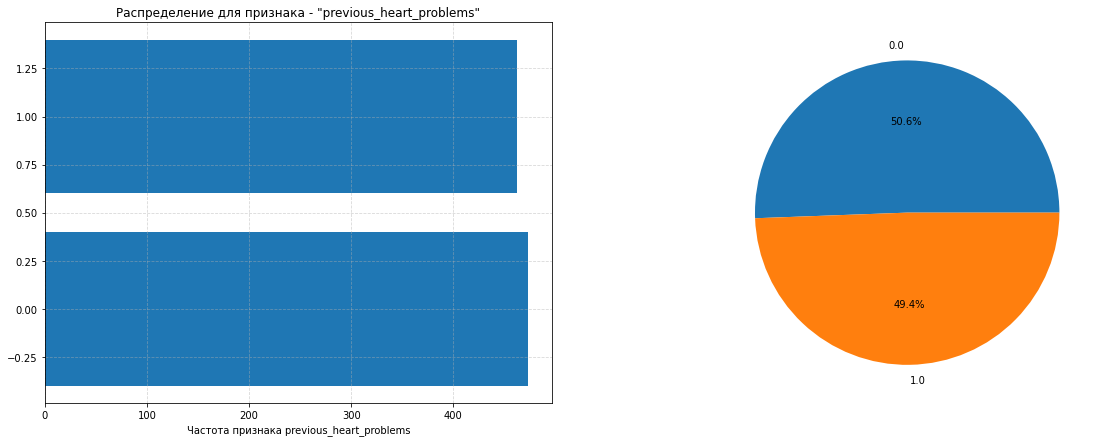

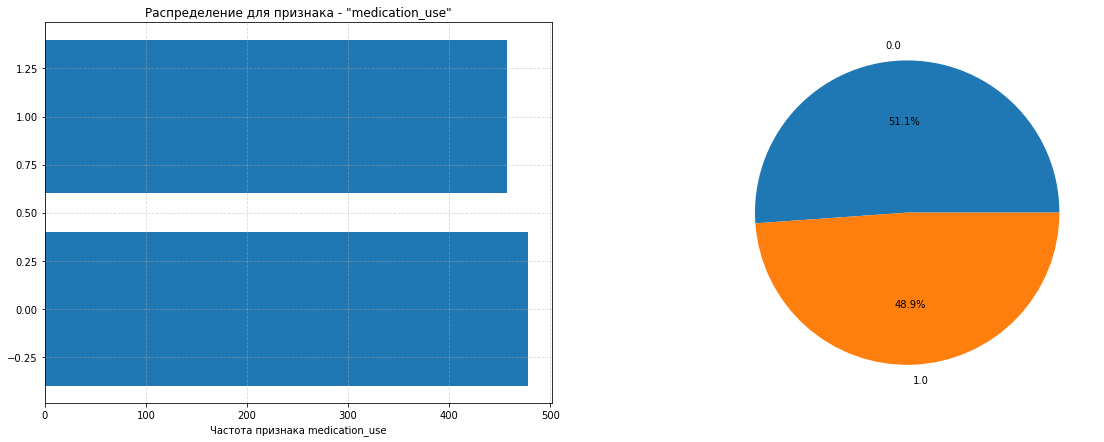

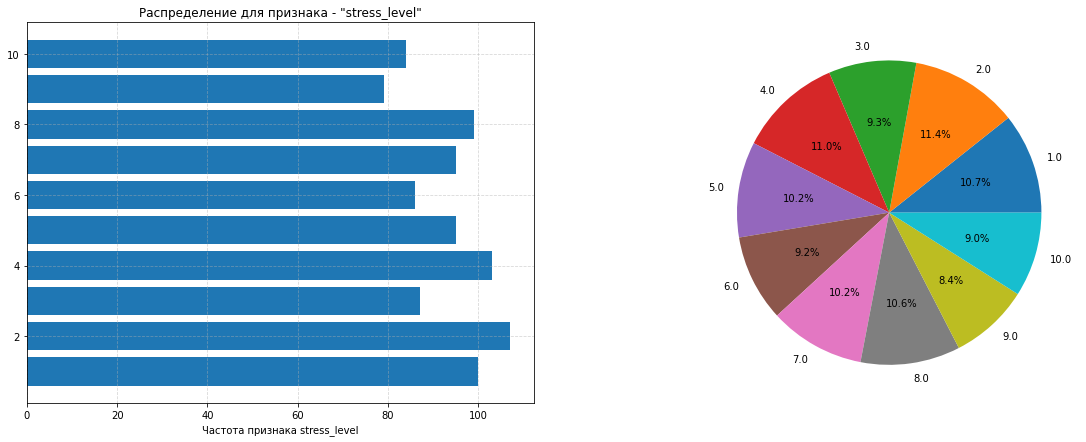

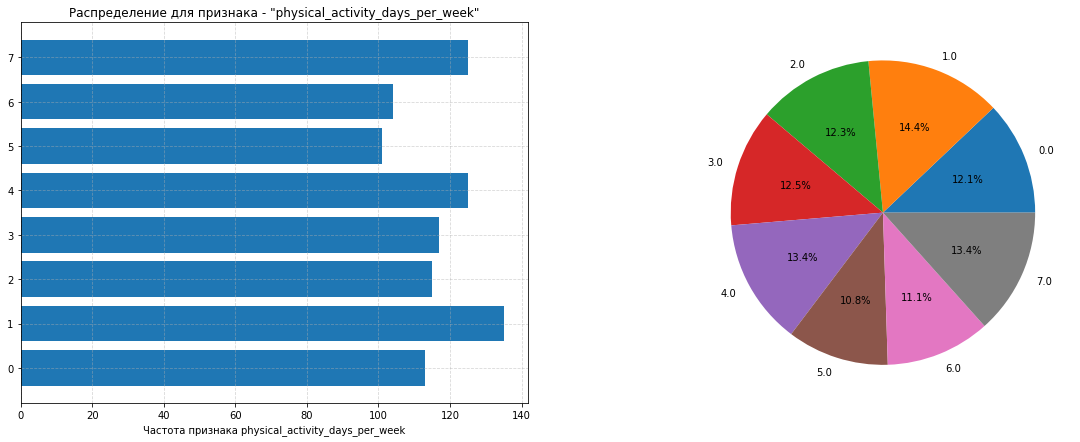

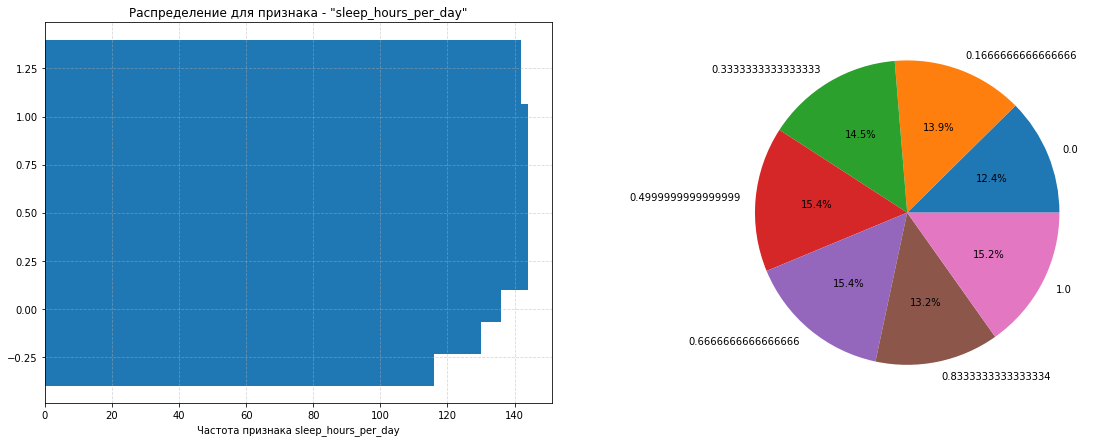

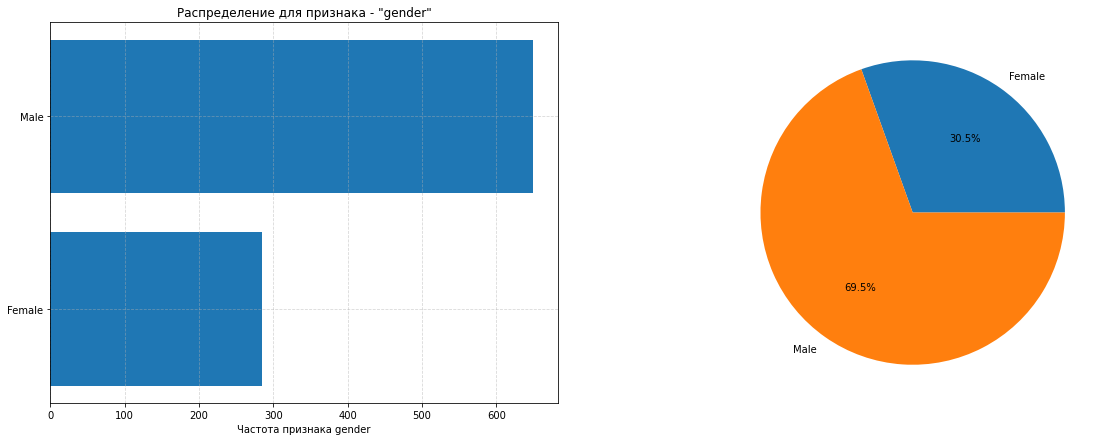

In [56]:
# построим диаграммы для категориальных признаков датафрейма
for feature in cat_col_heart_no_target:
    barh_and_pie(heart_test, feature, 'id')

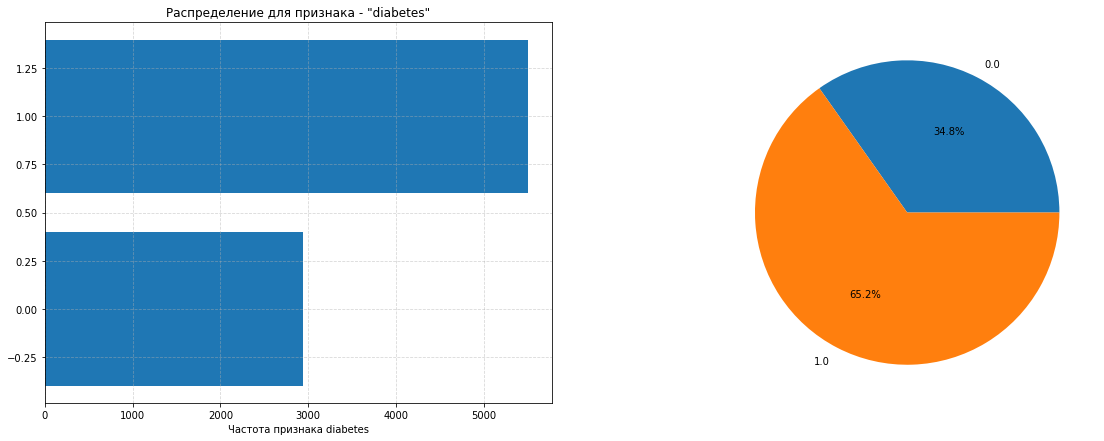

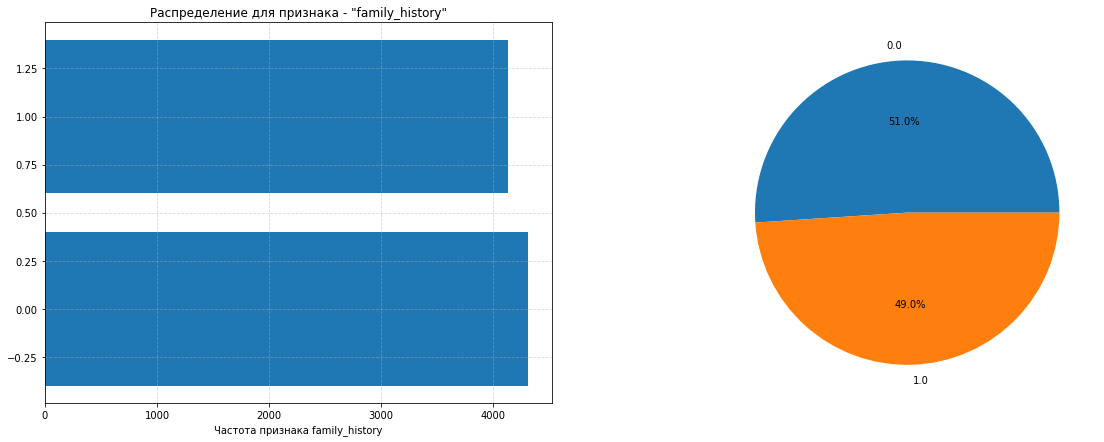

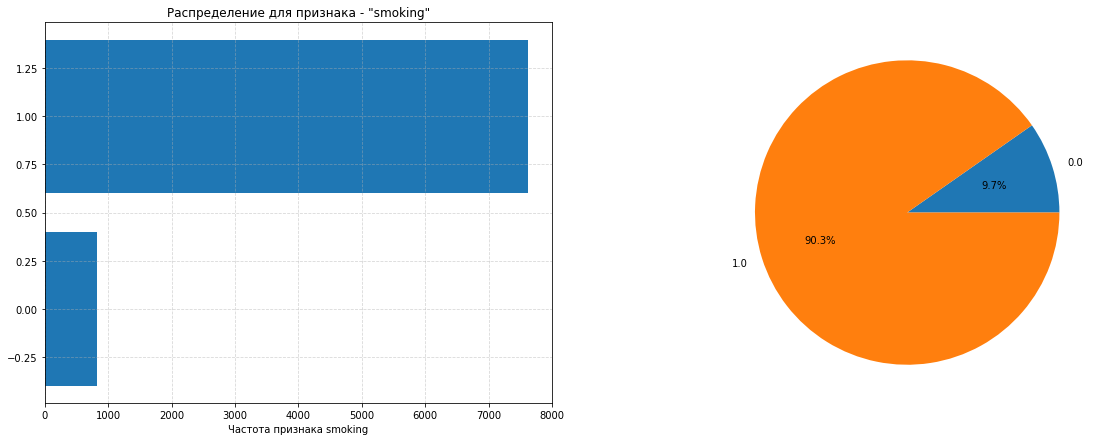

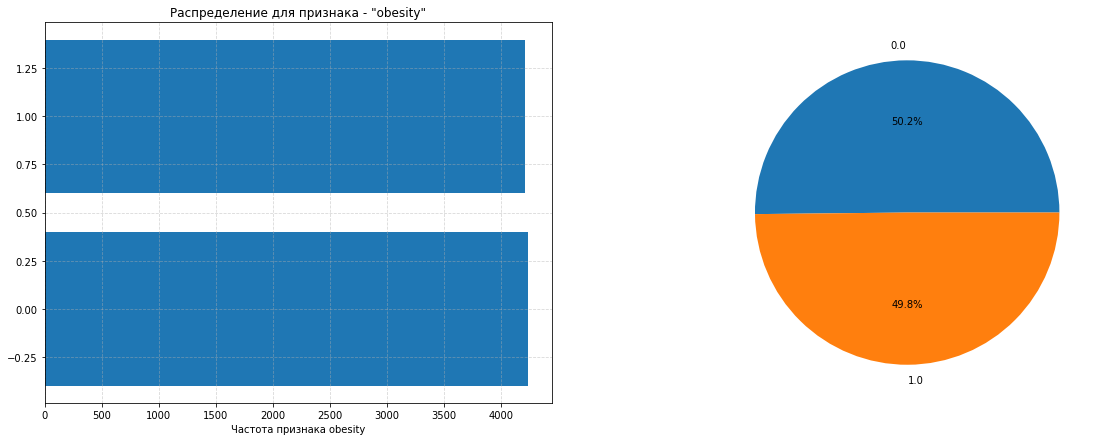

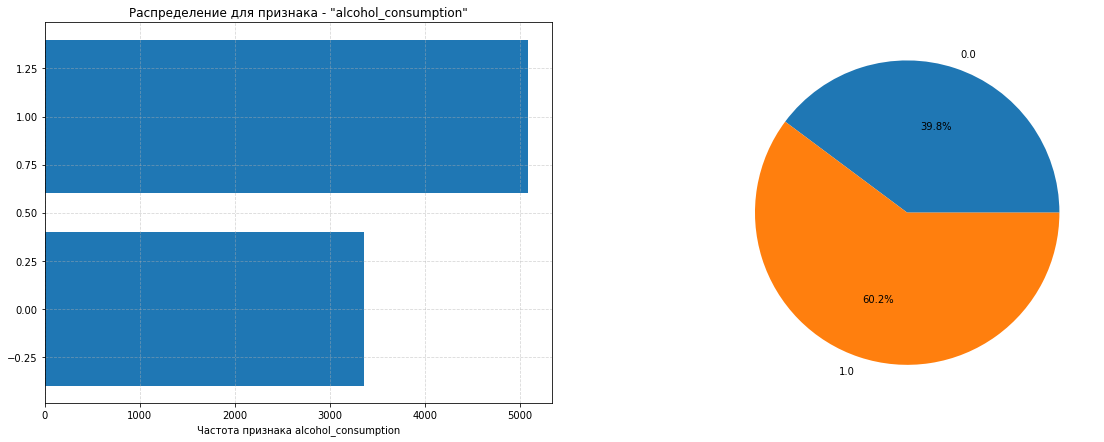

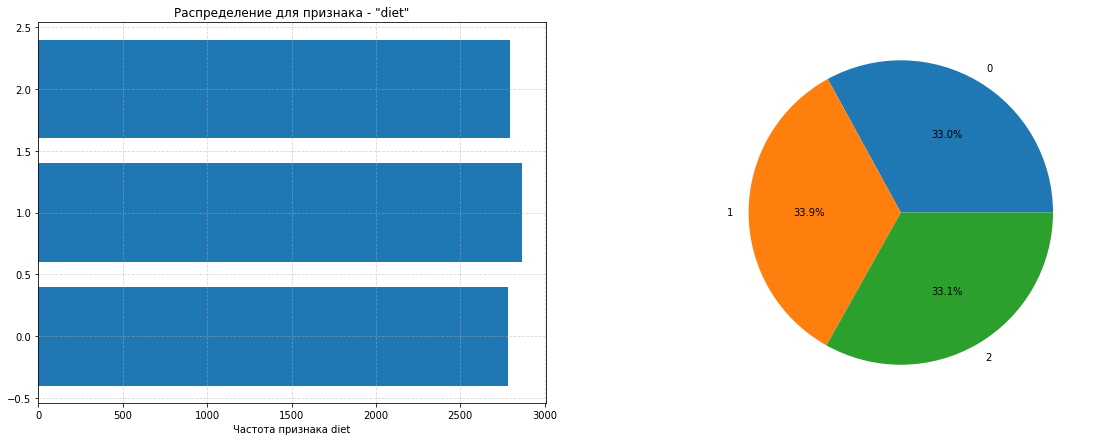

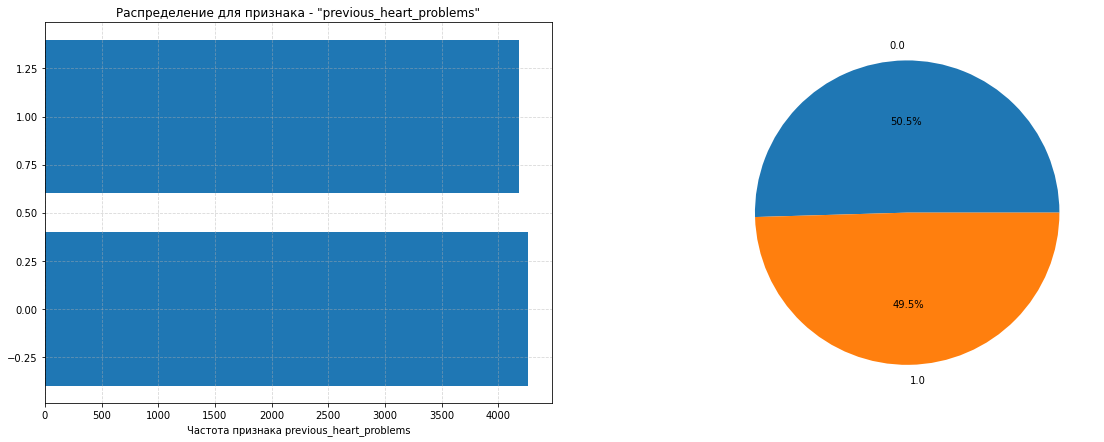

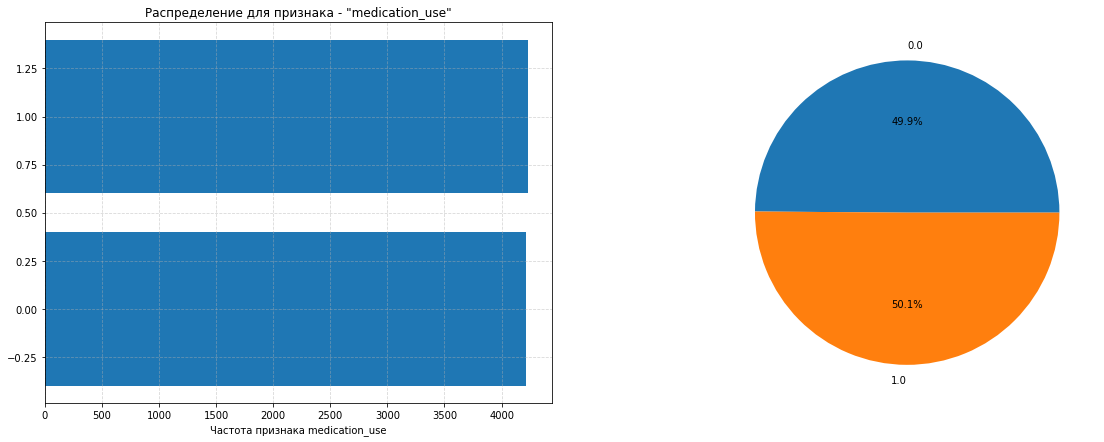

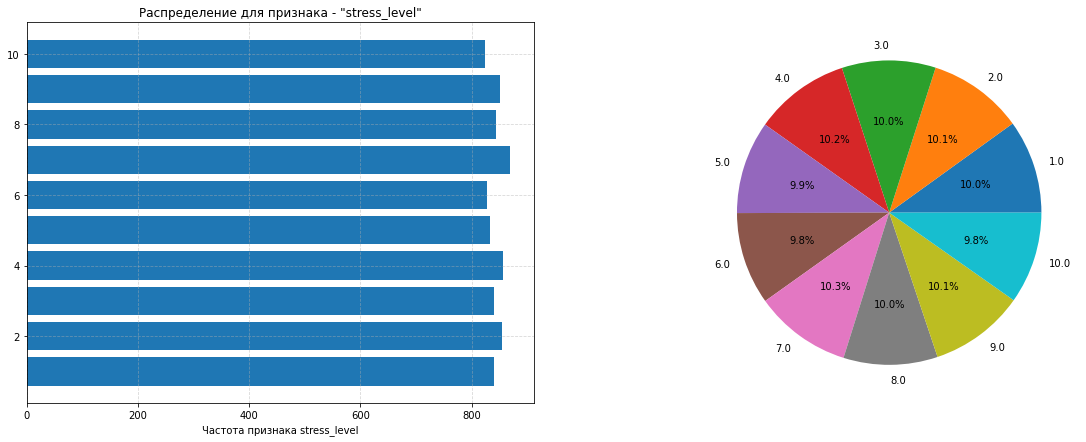

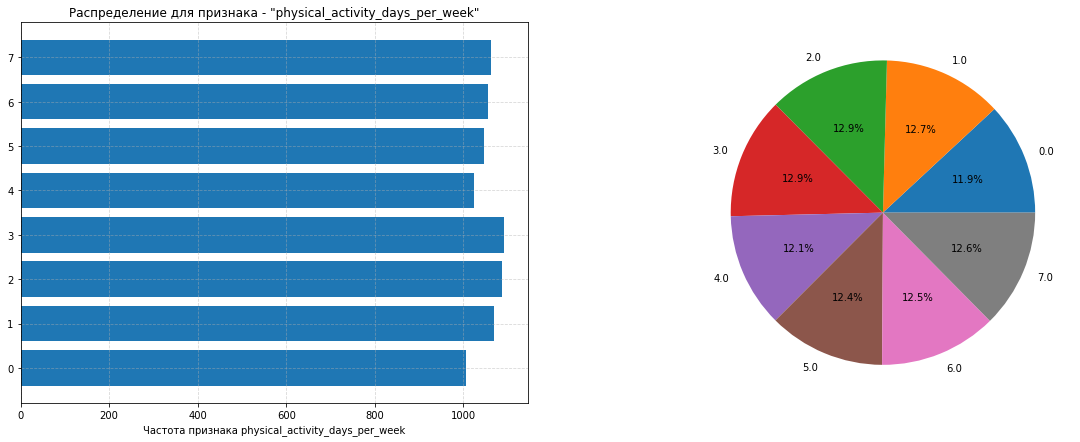

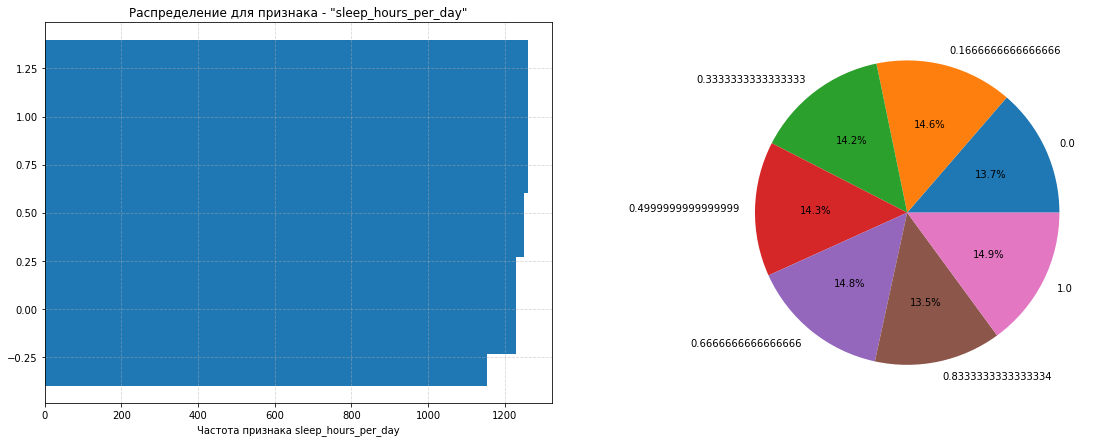

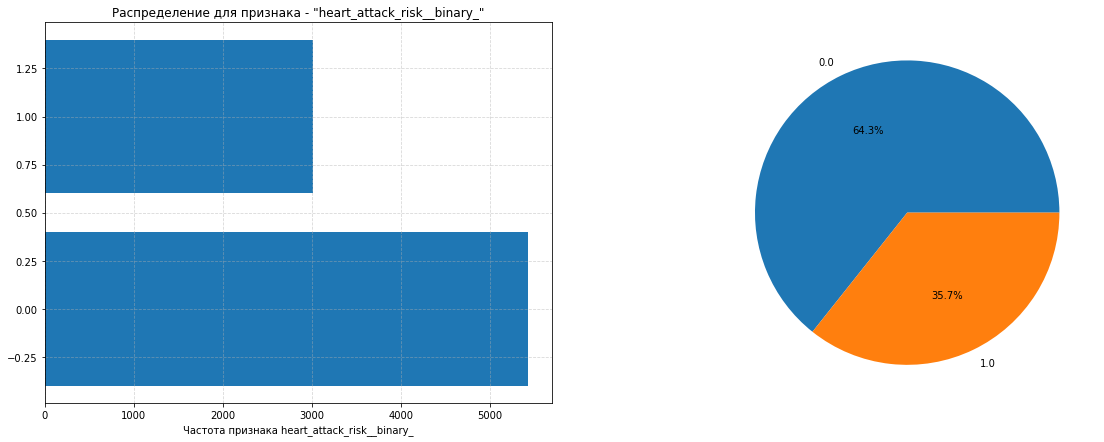

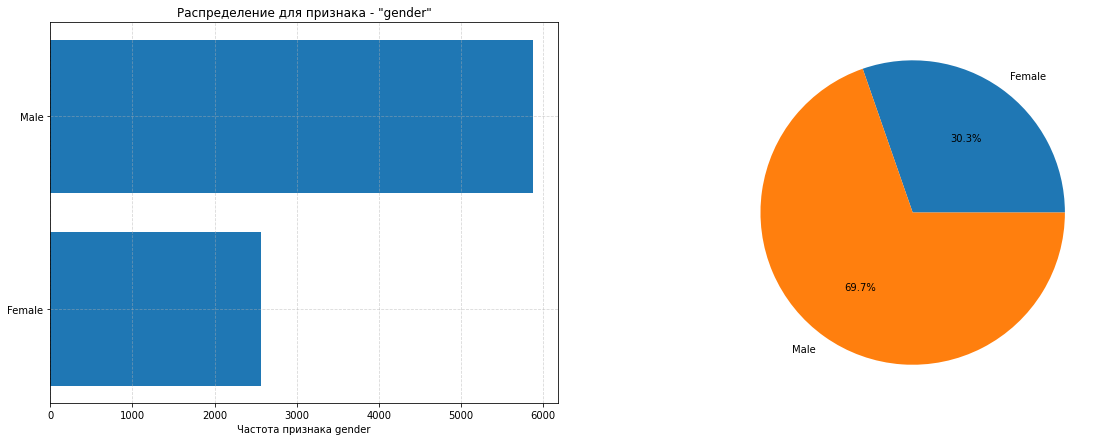

In [57]:
# построим диаграммы для категориальных признаков датафрейма
for feature in cat_col_heart:
    barh_and_pie(heart_train, feature, 'id')

___
#### Вывод по исследовательскому анализу данных

1. Выполнена предварительная подготовка предоставленных датасетов ([см.п.2.1.1](#conclusion1)):
    - Приведены наименования столбцов к стандарту PEP8
    - Удалены строки с пропущенными значениями (около 3% от общего числа значений признаков в датасетах)
    - Исключен признак `income` - доход, который не имеет значения для текущего проекта


2. Исследовательский анализ данных показал следующее:
    - Данные в тренеровочном и тестовом датасетах данные имеют аналогичные распределения:
        - `diabetes` 1-65% | 0-35%
        - `family_history` 1-49% | 0-51%
        - `smoking` 1-90% | 0-10%
        - `obesity` 1-50% | 0-50%
        - `alcohol_consumption` 1-60% | 0-40%
        - `diet` 0-33% | 1-33% | 2-33%
        - `previous_heart_problems` 1-50%|0-50%
        - `medication_use` 1-50% | 0-50%
        - `stress_level` от 1 до 10 по 10%
        - `physical_activity_days_per_week` от 0 до 7 по 12-13%
        - `sleep_hours_per_day` от 0 до 1 с интервалом 0.16 14-15% *(удивляет наличие пациентов со значением признака 0 и 1)*
        - `heart_attack_risk__binary_` 1-36% | 0-64% (только для тренеровочного датасета)
        - `gender` Male-70% | Female-30%
  
    - Данные всех количественных признаков не имеют нормального распределения
    - Для признаков `blood_sugar`, `ck_mb`, `troponin` 22% значений попали за границы диаграмм размаха, оставим как есть. Так как отклонения от нормальных значений данных признаков могут свидетельствовать о "нехороших" изменениях в организме человека
    - Наблюдается следующие корреляции:
        - высокая корреляция между признаками `gender`|`smoking` (0.70-0.71), 
        - средняя корреляция между признаками `age`|`smoking` (0.62), `age`|`blood_sugar` (0.36), `heart_rate`|`blood_sugar` (0.36), `ck_mb`|`blood_sugar` (0.34), `ck_mb`|`troponin` (0.28-0.52), `blood_sugar`|`troponin` (0.25-0.31)
        - низкая корреляция между признаками `age`|`ck_mb` (0.14), `age`|`troponin` (0.12), `blood_sugar`|`smoking` (0.12)



*В результате, можно составить следующий портрет пациента - человек мужкого рода, курящий, возможно с диабетом и употребляющий алкоголь (по остальным признакам вероятность равнозначна)*

___

### Подготовка данных для машинного обучения

___
Основные особенности данных:
- Целевой признак - `heart_attack_risk__binary_`  представлен в виде 0/1, кодировать не требуется
- Для количественных признаков `age`, `cholesterol`, `heart_rate`, `exercise_hours_per_week`, `sedentary_hours_per_day`, `bmi`, `triglycerides`, `blood_sugar`, `ck_mb`, `troponin`, `systolic_blood_pressure`, `diastolic_blood_pressure` предлагаю выполнить масштабирование
- Для категориальных признаков необходимо выполнить кодирование с применением следующих инструментов:
    - OrdinalEncoder для признаков `stress_level`, `physical_activity_days_per_week`, `sleep_hours_per_day`, так как для них важен порядок (ранговые переменные)
    - OneHotEncoder для признаков `diabetes`, `family_history`, `smoking`, `obesity`, `alcohol_consumption`, `diet`, `previous_heart_problems`, `medication_use`, `male`

In [58]:
display(heart_train.shape)
display(heart_train.head())

(8442, 26)

,age,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,diet,previous_heart_problems,medication_use,stress_level,sedentary_hours_per_day,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,heart_attack_risk__binary_,blood_sugar,ck_mb,troponin,gender,systolic_blood_pressure,diastolic_blood_pressure,id
0,0.359551,0.732143,0.074244,1.0,1.0,1.0,1.0,1.0,0.535505,1,1.0,0.0,8.0,0.225704,0.459176,0.979221,3.0,0.333333,0.0,0.227018,0.048229,0.036512,Male,0.212903,0.709302,2664
1,0.202247,0.325000,0.047663,1.0,1.0,0.0,0.0,1.0,0.068690,2,1.0,0.0,9.0,0.289923,0.117053,0.515584,3.0,0.833333,0.0,0.150198,0.017616,0.000194,Female,0.412903,0.569767,9287
2,0.606742,0.860714,0.055912,1.0,0.0,1.0,1.0,1.0,0.944001,2,1.0,1.0,6.0,0.550133,0.373574,0.012987,2.0,1.000000,0.0,0.227018,0.048229,0.036512,Female,0.238710,0.220930,5379
3,0.730337,0.007143,0.053162,0.0,0.0,1.0,0.0,1.0,0.697023,0,0.0,1.0,3.0,0.330962,0.049735,0.131169,0.0,0.333333,1.0,0.227018,0.048229,0.036512,Female,0.348387,0.267442,8222
4,0.775281,0.757143,0.021998,0.0,0.0,1.0,0.0,1.0,0.412878,1,0.0,0.0,8.0,0.524600,0.830405,0.070130,5.0,1.000000,1.0,0.227018,0.048229,0.036512,Male,0.619355,0.441860,4047


In [59]:
display(heart_test.shape)
display(heart_test.head())

(935, 25)

,age,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,diet,previous_heart_problems,medication_use,stress_level,sedentary_hours_per_day,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,blood_sugar,ck_mb,troponin,gender,systolic_blood_pressure,diastolic_blood_pressure,id
0,0.494382,0.264286,0.062328,0.0,1.0,1.0,1.0,1.0,0.361618,2,0.0,0.0,8.0,0.194370,0.283490,0.306494,1.0,0.333333,0.227018,0.048229,0.036512,Male,0.283871,0.372093,7746
1,0.224719,0.953571,0.082493,1.0,0.0,0.0,1.0,0.0,0.996483,2,1.0,1.0,5.0,0.329888,0.467036,0.087013,0.0,0.166667,0.227018,0.048229,0.036512,Female,0.703226,0.441860,4202
2,0.629213,0.092857,0.064161,0.0,1.0,1.0,1.0,0.0,0.995561,0,0.0,0.0,10.0,0.780075,0.409366,0.205195,7.0,1.000000,0.102767,0.002666,0.088455,Male,0.458065,0.779070,6632
3,0.460674,0.567857,0.055912,1.0,1.0,1.0,1.0,1.0,0.437277,0,0.0,0.0,10.0,0.785071,0.910261,0.163636,0.0,0.666667,0.203557,0.056390,0.271774,Female,0.741935,0.255814,4639
4,0.719101,0.485714,0.022915,1.0,0.0,1.0,0.0,1.0,0.514920,0,0.0,0.0,7.0,0.070919,0.758924,0.580519,5.0,0.000000,0.227018,0.048229,0.036512,Male,0.412903,0.395349,4825


In [60]:
# столбец 'id' привратим в индексы
display(heart_train.shape)
heart_train = heart_train.set_index('id')
display(heart_train.shape)
display(heart_train.head())

(8442, 26)

(8442, 25)

,age,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,diet,previous_heart_problems,medication_use,stress_level,sedentary_hours_per_day,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,heart_attack_risk__binary_,blood_sugar,ck_mb,troponin,gender,systolic_blood_pressure,diastolic_blood_pressure
id,,,,,,,,,,,,,,,,,,,,,,,,,
2664,0.359551,0.732143,0.074244,1.0,1.0,1.0,1.0,1.0,0.535505,1,1.0,0.0,8.0,0.225704,0.459176,0.979221,3.0,0.333333,0.0,0.227018,0.048229,0.036512,Male,0.212903,0.709302
9287,0.202247,0.325000,0.047663,1.0,1.0,0.0,0.0,1.0,0.068690,2,1.0,0.0,9.0,0.289923,0.117053,0.515584,3.0,0.833333,0.0,0.150198,0.017616,0.000194,Female,0.412903,0.569767
5379,0.606742,0.860714,0.055912,1.0,0.0,1.0,1.0,1.0,0.944001,2,1.0,1.0,6.0,0.550133,0.373574,0.012987,2.0,1.000000,0.0,0.227018,0.048229,0.036512,Female,0.238710,0.220930
8222,0.730337,0.007143,0.053162,0.0,0.0,1.0,0.0,1.0,0.697023,0,0.0,1.0,3.0,0.330962,0.049735,0.131169,0.0,0.333333,1.0,0.227018,0.048229,0.036512,Female,0.348387,0.267442
4047,0.775281,0.757143,0.021998,0.0,0.0,1.0,0.0,1.0,0.412878,1,0.0,0.0,8.0,0.524600,0.830405,0.070130,5.0,1.000000,1.0,0.227018,0.048229,0.036512,Male,0.619355,0.441860


In [61]:
# Количество признаков уменьшилось, проверим на наличие явных дубликатов
print('Количество явных дубликатов heart_train:', heart_train.duplicated().sum())

Количество явных дубликатов heart_train: 0


In [62]:
# столбец 'id' привратим в индексы
display(heart_test.shape)
heart_test = heart_test.set_index('id')
display(heart_test.shape)
display(heart_test.head())

(935, 25)

(935, 24)

,age,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,diet,previous_heart_problems,medication_use,stress_level,sedentary_hours_per_day,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,blood_sugar,ck_mb,troponin,gender,systolic_blood_pressure,diastolic_blood_pressure
id,,,,,,,,,,,,,,,,,,,,,,,,
7746,0.494382,0.264286,0.062328,0.0,1.0,1.0,1.0,1.0,0.361618,2,0.0,0.0,8.0,0.194370,0.283490,0.306494,1.0,0.333333,0.227018,0.048229,0.036512,Male,0.283871,0.372093
4202,0.224719,0.953571,0.082493,1.0,0.0,0.0,1.0,0.0,0.996483,2,1.0,1.0,5.0,0.329888,0.467036,0.087013,0.0,0.166667,0.227018,0.048229,0.036512,Female,0.703226,0.441860
6632,0.629213,0.092857,0.064161,0.0,1.0,1.0,1.0,0.0,0.995561,0,0.0,0.0,10.0,0.780075,0.409366,0.205195,7.0,1.000000,0.102767,0.002666,0.088455,Male,0.458065,0.779070
4639,0.460674,0.567857,0.055912,1.0,1.0,1.0,1.0,1.0,0.437277,0,0.0,0.0,10.0,0.785071,0.910261,0.163636,0.0,0.666667,0.203557,0.056390,0.271774,Female,0.741935,0.255814
4825,0.719101,0.485714,0.022915,1.0,0.0,1.0,0.0,1.0,0.514920,0,0.0,0.0,7.0,0.070919,0.758924,0.580519,5.0,0.000000,0.227018,0.048229,0.036512,Male,0.412903,0.395349


In [63]:
# Количество признаков уменьшилось, проверим на наличие явных дубликатов
print('Количество явных дубликатов heart_test:', heart_test.duplicated().sum())

Количество явных дубликатов heart_test: 0


In [64]:
# внесем изменения в типы данных
int_columns = ['diabetes', 
               'family_history', 
               'smoking', 
               'obesity', 
               'alcohol_consumption', 
               'previous_heart_problems', 
               'medication_use', 
               'stress_level', 
               'physical_activity_days_per_week', 
               'heart_attack_risk__binary_']
heart_train[int_columns] = heart_train[int_columns].astype('int32')
heart_train.info()
heart_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8442 entries, 2664 to 7270
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              8442 non-null   float64
 1   cholesterol                      8442 non-null   float64
 2   heart_rate                       8442 non-null   float64
 3   diabetes                         8442 non-null   int32  
 4   family_history                   8442 non-null   int32  
 5   smoking                          8442 non-null   int32  
 6   obesity                          8442 non-null   int32  
 7   alcohol_consumption              8442 non-null   int32  
 8   exercise_hours_per_week          8442 non-null   float64
 9   diet                             8442 non-null   int64  
 10  previous_heart_problems          8442 non-null   int32  
 11  medication_use                   8442 non-null   int32  
 12  stress_level     

,age,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,diet,previous_heart_problems,medication_use,stress_level,sedentary_hours_per_day,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,heart_attack_risk__binary_,blood_sugar,ck_mb,troponin,gender,systolic_blood_pressure,diastolic_blood_pressure
id,,,,,,,,,,,,,,,,,,,,,,,,,
2664,0.359551,0.732143,0.074244,1,1,1,1,1,0.535505,1,1,0,8,0.225704,0.459176,0.979221,3,0.333333,0,0.227018,0.048229,0.036512,Male,0.212903,0.709302
9287,0.202247,0.325000,0.047663,1,1,0,0,1,0.068690,2,1,0,9,0.289923,0.117053,0.515584,3,0.833333,0,0.150198,0.017616,0.000194,Female,0.412903,0.569767
5379,0.606742,0.860714,0.055912,1,0,1,1,1,0.944001,2,1,1,6,0.550133,0.373574,0.012987,2,1.000000,0,0.227018,0.048229,0.036512,Female,0.238710,0.220930
8222,0.730337,0.007143,0.053162,0,0,1,0,1,0.697023,0,0,1,3,0.330962,0.049735,0.131169,0,0.333333,1,0.227018,0.048229,0.036512,Female,0.348387,0.267442
4047,0.775281,0.757143,0.021998,0,0,1,0,1,0.412878,1,0,0,8,0.524600,0.830405,0.070130,5,1.000000,1,0.227018,0.048229,0.036512,Male,0.619355,0.441860


In [65]:
heart_train['sleep_hours_per_day'] = heart_train['sleep_hours_per_day'].round(5).astype(str)

In [66]:
heart_train.sort_values(by='sleep_hours_per_day')['sleep_hours_per_day'].unique()

array(['0.0', '0.16667', '0.33333', '0.5', '0.66667', '0.83333', '1.0'],
      dtype=object)

In [67]:
int_columns_no_target = [x for x in int_columns if x != 'heart_attack_risk__binary_']
heart_test[int_columns_no_target] = heart_test[int_columns_no_target].astype('int32')
heart_test.info()
heart_test.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 935 entries, 7746 to 6521
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              935 non-null    float64
 1   cholesterol                      935 non-null    float64
 2   heart_rate                       935 non-null    float64
 3   diabetes                         935 non-null    int32  
 4   family_history                   935 non-null    int32  
 5   smoking                          935 non-null    int32  
 6   obesity                          935 non-null    int32  
 7   alcohol_consumption              935 non-null    int32  
 8   exercise_hours_per_week          935 non-null    float64
 9   diet                             935 non-null    int64  
 10  previous_heart_problems          935 non-null    int32  
 11  medication_use                   935 non-null    int32  
 12  stress_level      

,age,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,diet,previous_heart_problems,medication_use,stress_level,sedentary_hours_per_day,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,blood_sugar,ck_mb,troponin,gender,systolic_blood_pressure,diastolic_blood_pressure
id,,,,,,,,,,,,,,,,,,,,,,,,
7746,0.494382,0.264286,0.062328,0,1,1,1,1,0.361618,2,0,0,8,0.194370,0.283490,0.306494,1,0.333333,0.227018,0.048229,0.036512,Male,0.283871,0.372093
4202,0.224719,0.953571,0.082493,1,0,0,1,0,0.996483,2,1,1,5,0.329888,0.467036,0.087013,0,0.166667,0.227018,0.048229,0.036512,Female,0.703226,0.441860
6632,0.629213,0.092857,0.064161,0,1,1,1,0,0.995561,0,0,0,10,0.780075,0.409366,0.205195,7,1.000000,0.102767,0.002666,0.088455,Male,0.458065,0.779070
4639,0.460674,0.567857,0.055912,1,1,1,1,1,0.437277,0,0,0,10,0.785071,0.910261,0.163636,0,0.666667,0.203557,0.056390,0.271774,Female,0.741935,0.255814
4825,0.719101,0.485714,0.022915,1,0,1,0,1,0.514920,0,0,0,7,0.070919,0.758924,0.580519,5,0.000000,0.227018,0.048229,0.036512,Male,0.412903,0.395349


In [68]:
heart_test['sleep_hours_per_day'] = heart_test['sleep_hours_per_day'].round(5).astype(str)

In [69]:
heart_test.sort_values(by='sleep_hours_per_day')['sleep_hours_per_day'].unique()

array(['0.0', '0.16667', '0.33333', '0.5', '0.66667', '0.83333', '1.0'],
      dtype=object)

#### Подготовка обучающей, валидационной и тестовой выборок

In [70]:
# Разобьем данные на тренировочную и валидационную выборки

X_heart_train, X_heart_valid, y_heart_train, y_heart_valid = train_test_split(
    heart_train.drop(['heart_attack_risk__binary_'], axis=1),
    heart_train['heart_attack_risk__binary_'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = heart_train['heart_attack_risk__binary_'])

In [71]:
print(y_heart_train.shape)
print(X_heart_train.shape)
print(y_heart_valid.shape)
print(X_heart_valid.shape)

(6753,)
(6753, 24)
(1689,)
(1689, 24)


In [72]:
# сделаем копию тестовой выборки
X_heart_test = heart_test.copy()
print(X_heart_test.shape)

(935, 24)


#### Подготовка Pipeline

In [73]:
# Разделим признаки в соответствии с описанными особенностями и методами обработки
# количественные
print('num_col_heart', num_col_heart)
print('-------------------------------------------')

# категориальные
ohe_columns = ['diabetes', 
               'family_history', 
               'smoking', 
               'obesity', 
               'alcohol_consumption', 
               'diet', 
               'previous_heart_problems', 
               'medication_use', 
               'gender'] 
print('ohe_columns', ohe_columns)
print('-------------------------------------------')

ord_columns = ['stress_level', 
               'physical_activity_days_per_week', 
               'sleep_hours_per_day']
print('ord_columns', ord_columns)

num_col_heart ['age', 'cholesterol', 'heart_rate', 'exercise_hours_per_week', 'sedentary_hours_per_day', 'bmi', 'triglycerides', 'blood_sugar', 'ck_mb', 'troponin', 'systolic_blood_pressure', 'diastolic_blood_pressure']
-------------------------------------------
ohe_columns ['diabetes', 'family_history', 'smoking', 'obesity', 'alcohol_consumption', 'diet', 'previous_heart_problems', 'medication_use', 'gender']
-------------------------------------------
ord_columns ['stress_level', 'physical_activity_days_per_week', 'sleep_hours_per_day']


In [74]:
# Cоздаём пайплайн для подготовки признаков из списка 'ohe_columns'
# дополнительно добавим шаг с применением SimpleImputer для случая, когда в датафрейме на входе будут пропуски в данных
# если в данных будут пропуски, то заполним их самым часто встречающимся значением 

ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe', 
         SimpleImputer(missing_values=np.nan, 
                       strategy='most_frequent')), 
        ('ohe', 
         OneHotEncoder(drop='first', 
                       handle_unknown='ignore', 
                       sparse_output=False))
    ]
)

In [75]:
# Cоздаём пайплайн для подготовки признаков из списка 'ord_columns'
# дополнительно добавим шаг с применением SimpleImputer для случая, когда в датафрейме на входе будут пропуски в данных
# если в данных будут пропуски, то заполним их самым часто встречающимся значением 

ord_pipe = Pipeline(
    [
        ('simpleImputer_ord', 
         SimpleImputer(missing_values=np.nan, 
                       strategy='most_frequent')), 
        ('ord', 
         OrdinalEncoder(categories=[
             [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
             [0, 1, 2, 3, 4, 5, 6, 7],
             heart_train.sort_values(by='sleep_hours_per_day')['sleep_hours_per_day'].unique()
         ], 
                        handle_unknown='use_encoded_value', unknown_value=-1))
    ]
)

In [76]:
# Объединим кодирование категориальных и масштабирование количественных признаков в один пайплайн 'data_preprocessor' 
# 'data_preprocessor' - пайплайн для подготовки данных

data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_col_heart)
    ], 
    remainder='passthrough'
)

In [77]:
# Создаём итоговый пайплайн 'pipe_final': подготовка данных и модель
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', LogisticRegression(random_state=RANDOM_STATE))
    ]
) 

## Обучение различных моделей и выбор наилучшей

### Поиск оптимальной модели с перебором гиперпараметров

In [78]:
# Создадим список словарей, в котором каждый словарь — это модель с гиперпараметрами и методами подготовки данных 

param_distributions = [
    # словарь для модели KNeighborsClassifier() 
#    {
#        'models': [KNeighborsClassifier()],
#        'models__n_neighbors': range(3, 15),
#        'models__weights': ['uniform', 'distance'],
#        'models__metric': ['euclidean', 'manhattan', 'minkowski'],        
#        'preprocessor__num': [StandardScaler(), MinMaxScaler()]   
#    },
    # словарь для модели GradientBoostingClassifier()
    {
        'models': [GradientBoostingClassifier(random_state=RANDOM_STATE)],
        'models__n_estimators': np.arange(300, 700, step=20),
        'models__subsample' : [0.66, 0.75, 1],
        'models__learning_rate': np.arange(0.05, 0.1, step=0.01), 
        'models__max_depth': randint(5, 15),
        'models__loss': ['log_loss', 'exponential'],
        'models__min_samples_leaf': randint(3, 8),
        'models__min_samples_split': randint(2, 7),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    # словарь для модели LogisticRegression()
#   {
#       'models': [LogisticRegression(random_state=RANDOM_STATE, class_weight='balanced', solver='liblinear')],
#       'models__penalty': ['l1', 'l2'],
#       'models__C': range(1, 10),
#       'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
#   },
    # словарь для модели RandomForestClassifier()
    {
        'models': [RandomForestClassifier(random_state=RANDOM_STATE)],
        'models__n_estimators': np.arange(20, 700, step=20),
#        'models__criterion': ['gini', 'entropy'],
        'models__max_depth': np.arange(1, 20, step=1),
        'models__min_samples_leaf': np.arange(1, 10, step=1),
        'models__min_samples_split': np.arange(2, 20, step=1),
        'models__class_weight': ['balanced', None],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    # словарь для модели CatBoostClassifier()
    {
        'models': [CatBoostClassifier(verbose=0,
#                                      eval_metric='AUC',
                                      cat_features = cat_col_heart_no_target,
                                      random_state=RANDOM_STATE)],
#        'models__learning_rate': [0.01, 0.03, 0.05, 0.1],
#        'models__subsample' : [0.66, 0.75, 1],
        'models__n_estimators': np.arange(300, 700, step=50),
        'models__max_depth': randint(3, 15),
#        'models__ignored_features': np.arange(0, 5, step=1),
        'preprocessor': ['passthrough']
    }
] 

___
Для решения задачи бинарной классификации в проекте предлагаю использовать метрику оценки качества и сравнения моделей F1-score, потому что:
- наблюдается дисбаланс классов (`heart_attack_risk__binary_` 1-36% | 0-64%)
- важен баланс между обнаружением положительных случаев (Recall) и минимализацией ложных срабатываний (Precision)
___

In [79]:
# Создание F1-scorer 
f1_scorer = make_scorer(f1_score, pos_label=1) 
# pos_label=1 - явно создаем метрику для F1-score с фокусом на положительном классе

In [80]:
# %%time

# поиск оптимальной модели с перебором гиперпараметров
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_distributions=param_distributions, 
    scoring=f1_scorer, 
    random_state=RANDOM_STATE,
    cv=CV,
    n_iter=50,
#    error_score='raise',
    verbose=1,
    n_jobs=-1
)

# обучение модели на тренировочной выборке
randomized_search.fit(X_heart_train, y_heart_train) 

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['diabetes',
                                                                                'family_history',
                                                                                'smoking',
                                                                                'obesity',
                                                                                'alcohol_con...
                                        {'models': [<catboost.core.CatBoostClassifier object at 0x7fdafe2f4b20>],
                                         'models__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fdafe2f46d0>,
                                         'models__n_estimators': array([300, 350, 400, 450, 500, 550, 600, 650]),
                                         'preprocessor': ['passthrough']}],
                   random_state=42,
                   scoring=make_scorer(f1_score, response_method='predict', pos_label=1),
                   verbose=1)

In [81]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_params_) 
print('-------------------------------------------------------------------------------------')
print('Метрика F1-scorer для лучшей модели на обучающей выборке:', round(randomized_search.best_score_, 4))
print('-------------------------------------------------------------------------------------')
print(randomized_search.best_estimator_) 

Лучшая модель и её параметры:

 {'models': RandomForestClassifier(random_state=42), 'models__class_weight': 'balanced', 'models__max_depth': 1, 'models__min_samples_leaf': 1, 'models__min_samples_split': 6, 'models__n_estimators': 380, 'preprocessor__num': 'passthrough'}
-------------------------------------------------------------------------------------
Метрика F1-scorer для лучшей модели на обучающей выборке: 0.4175
-------------------------------------------------------------------------------------
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   One

In [82]:
# Просмотр ТОП-5 лучших моделей по результатам поиска
results_randomized_search = pd.DataFrame(randomized_search.cv_results_)
display(results_randomized_search.query('rank_test_score<5').sort_values(by='rank_test_score'))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_models,param_models__max_depth,param_models__n_estimators,param_preprocessor,param_models__learning_rate,param_models__loss,param_models__min_samples_leaf,param_models__min_samples_split,param_models__subsample,param_preprocessor__num,param_models__class_weight,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
43,0.948799,0.012642,0.063265,0.001891,RandomForestClassifier(random_state=42),1,380,NaN,NaN,NaN,1.0,6.0,NaN,passthrough,balanced,{'models': RandomForestClassifier(random_state...,0.428925,0.415518,0.408100,0.417514,0.008618,1
48,2.178988,0.045177,0.120729,0.001523,RandomForestClassifier(random_state=42),2,660,NaN,NaN,NaN,2.0,18.0,NaN,StandardScaler(),balanced,{'models': RandomForestClassifier(random_state...,0.421529,0.414405,0.386957,0.407630,0.014905,2
3,1.856890,0.019316,0.101508,0.004014,RandomForestClassifier(random_state=42),2,600,NaN,NaN,NaN,8.0,13.0,NaN,MinMaxScaler(),balanced,{'models': RandomForestClassifier(random_state...,0.425213,0.415842,0.380536,0.407197,0.019236,3
22,3.211474,0.029569,0.138911,0.007661,RandomForestClassifier(random_state=42),6,560,NaN,NaN,NaN,4.0,12.0,NaN,StandardScaler(),balanced,{'models': RandomForestClassifier(random_state...,0.379717,0.380840,0.370695,0.377084,0.004541,4


In [83]:
# Проверяем модель на валидационной выборке
y_heart_valid_pred = randomized_search.best_estimator_.predict(X_heart_valid)
print('Метрика F1-score для лучшей модели на валидационной выборке:', 
      f1_score(y_heart_valid, y_heart_valid_pred, pos_label=1))

Метрика F1-score для лучшей модели на валидационной выборке: 0.44401294498381877


### Поиск оптимального порога на валидационной выборке

In [84]:
# Сохраним обученный пайплайн с лучшей моделью из результатов RandomizedSearch
pipeline_best_model = randomized_search.best_estimator_

In [85]:
# получим вероятности класса 1
y_heart_valid_proba = pipeline_best_model.predict_proba(X_heart_valid)[:, 1]

In [86]:
# Ищем порог, максимизирующий F1 на валидационной выборке
precisions, recalls, thresholds = precision_recall_curve(y_heart_valid, y_heart_valid_proba)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_thresholds = thresholds[np.argmax(f1_scores)]
print('Порог, максимизирующий F1 на валидационной выборке:', best_thresholds)

Порог, максимизирующий F1 на валидационной выборке: 0.4908248526120897


In [87]:
df_precision_recall_curve = pd.DataFrame(zip(precisions, recalls, thresholds), 
                                         columns=['precision', 'recall', 'thresholds']).sort_values(by='thresholds', ascending=False)

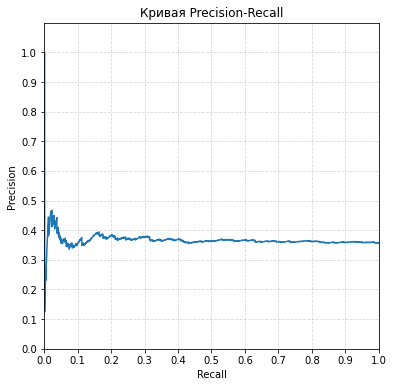

In [88]:
# построим кривую Precision-Recall

plt.figure(figsize=(6, 6))
plt.plot(recalls, precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.1])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(linestyle='--', alpha=0.5)
plt.title('Кривая Precision-Recall')
plt.show()

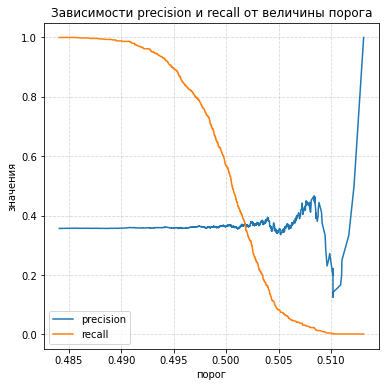

In [89]:
# построим зависимости precision и recall от величины порога
plt.figure(figsize=(6, 6))
ax = plt.plot(df_precision_recall_curve['thresholds'], df_precision_recall_curve['precision'], label='precision')
ax = plt.plot(df_precision_recall_curve['thresholds'], df_precision_recall_curve['recall'], label='recall')
plt.title('Зависимости precision и recall от величины порога')
plt.xlabel('порог')
plt.ylabel('значения')
plt.grid(linestyle='--', alpha=0.5)
plt.legend()
plt.show()

In [90]:
# Метрика F1-score с учетом порога на валидационной выборке
y_heart_valid_pred_final = (y_heart_valid_proba >= best_thresholds).astype(int)
final_valid_f1 = f1_score(y_heart_valid, y_heart_valid_pred_final, pos_label=1)
print('Метрика F1-score для лучшей модели на валидационной выборке с учетом выбранного порога:', 
      final_valid_f1)

Метрика F1-score для лучшей модели на валидационной выборке с учетом выбранного порога: 0.5277161862527716


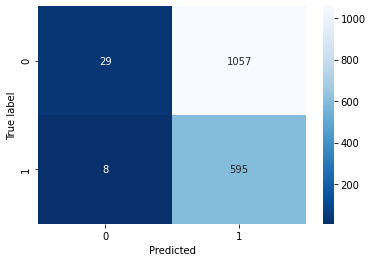

In [91]:
# построим матрицу ошибок
cm = confusion_matrix(y_heart_valid, 
                      y_heart_valid_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')
plt.show()

### Получение предсказаний для тестовой выборки

In [92]:
# Получение предсказаний для тестовой выборки
y_heart_test_proba = pipeline_best_model.predict_proba(X_heart_test)[:, 1]
y_heart_test_pred_final = (y_heart_test_proba >= best_thresholds).astype(int)

In [93]:
# Добавляем предсказания в датафрейм с признаками
heart_test['prediction'] = y_heart_test_pred_final
heart_test.head()

,age,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,diet,previous_heart_problems,medication_use,stress_level,sedentary_hours_per_day,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,blood_sugar,ck_mb,troponin,gender,systolic_blood_pressure,diastolic_blood_pressure,prediction
id,,,,,,,,,,,,,,,,,,,,,,,,,
7746,0.494382,0.264286,0.062328,0,1,1,1,1,0.361618,2,0,0,8,0.194370,0.283490,0.306494,1,0.33333,0.227018,0.048229,0.036512,Male,0.283871,0.372093,1
4202,0.224719,0.953571,0.082493,1,0,0,1,0,0.996483,2,1,1,5,0.329888,0.467036,0.087013,0,0.16667,0.227018,0.048229,0.036512,Female,0.703226,0.441860,1
6632,0.629213,0.092857,0.064161,0,1,1,1,0,0.995561,0,0,0,10,0.780075,0.409366,0.205195,7,1.0,0.102767,0.002666,0.088455,Male,0.458065,0.779070,0
4639,0.460674,0.567857,0.055912,1,1,1,1,1,0.437277,0,0,0,10,0.785071,0.910261,0.163636,0,0.66667,0.203557,0.056390,0.271774,Female,0.741935,0.255814,1
4825,0.719101,0.485714,0.022915,1,0,1,0,1,0.514920,0,0,0,7,0.070919,0.758924,0.580519,5,0.0,0.227018,0.048229,0.036512,Male,0.412903,0.395349,1


In [94]:
# готовим датафрейм для записи в файл
submission_df = heart_test[['prediction']]
submission_df.head()

,prediction
id,
7746,1
4202,1
6632,0
4639,1
4825,1


In [95]:
# сохраняем датафрейм с предсказаниями в файл csv, учитывая что индексы - это id
submission_df.to_csv('predictions_heart_attack_risk.csv', index=True)

In [96]:
!cat predictions_heart_attack_risk.csv | head

id,prediction
7746,1
4202,1
6632,0
4639,1
4825,1
1076,1
5020,1
4267,0
4003,1


### Анализ важности признаков

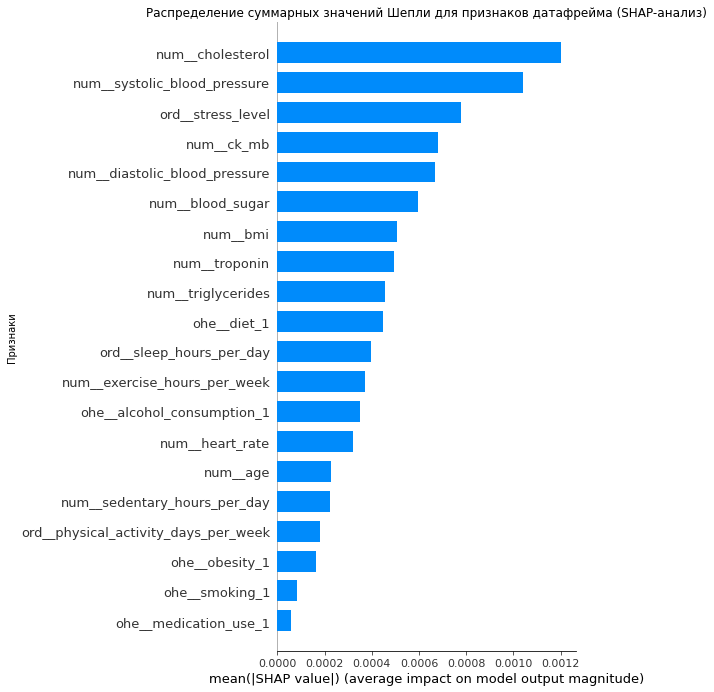

In [97]:
# SHAP-анализ

# Сохраним лучшую модель из результатов RandomizedSearch
best_model = randomized_search.best_estimator_['models']

# Выполним предобработку данных для тренеровочной и тестовой выборок
preprocessor_pipe = randomized_search.best_estimator_.named_steps['preprocessor']
X_heart_train_preprocessed = preprocessor_pipe.fit_transform(X_heart_train)
X_heart_valid_preprocessed = preprocessor_pipe.transform(X_heart_valid)

# Получим названия признаков и добавим в тестовую выборку названиями столбцов
feature_names = preprocessor_pipe.get_feature_names_out()
X_heart_valid_preprocessed = pd.DataFrame(X_heart_valid_preprocessed, columns=feature_names)

# Создаем Explainer для дерева решений
explainer = shap.TreeExplainer(best_model)

# Получаем SHAP-значения для данных
shap_values = explainer(X_heart_valid_preprocessed)

class_names = [0, 1]  # Имена классов

# Визуализиурем важность признаков для для класса 1 

shap.summary_plot(shap_values[:,:,1], 
                  X_heart_valid_preprocessed, 
                  feature_names=feature_names, 
                  plot_type="bar", 
                  show=False)

plt.ylabel('Признаки')
plt.title(f'Распределение суммарных значений Шепли для признаков датафрейма (SHAP-анализ)')
plt.show()

,ohe__diabetes_1,ohe__family_history_1,ohe__smoking_1,ohe__obesity_1,ohe__alcohol_consumption_1,ohe__diet_1,ohe__diet_2,ohe__previous_heart_problems_1,ohe__medication_use_1,ohe__gender_Male,ord__stress_level,ord__physical_activity_days_per_week,ord__sleep_hours_per_day,num__age,num__cholesterol,num__heart_rate,num__exercise_hours_per_week,num__sedentary_hours_per_day,num__bmi,num__triglycerides,num__blood_sugar,num__ck_mb,num__troponin,num__systolic_blood_pressure,num__diastolic_blood_pressure
5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,4.0,2.0,2.0,0.483146,0.864286,0.068744,0.791651,0.026522,0.248408,0.846753,0.426877,0.013411,1.0,0.232258,0.418605


1

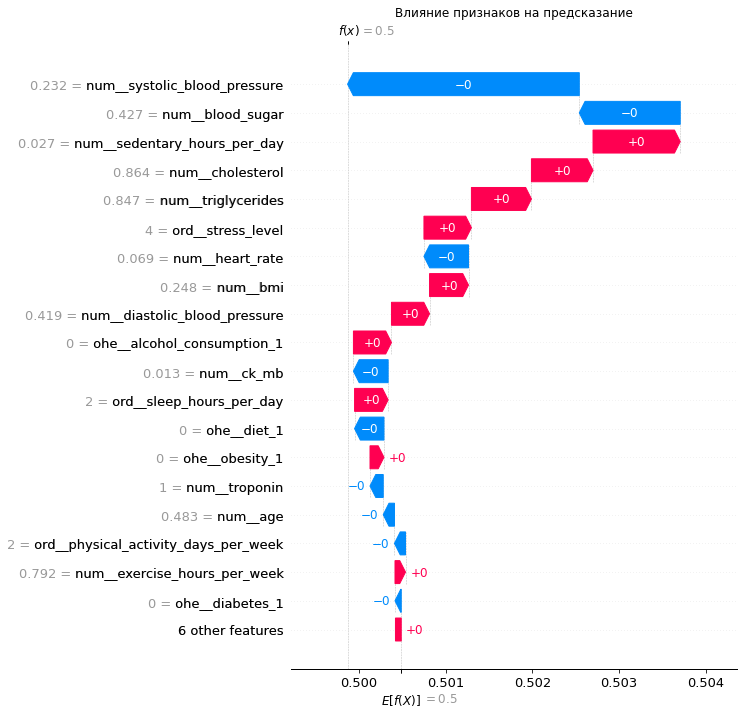

In [98]:
# для примера визуализируем индивидуальные SHAP-значения 5 объекта в датафрейме
display(X_heart_valid_preprocessed.loc[X_heart_valid_preprocessed.index == 5])
display(y_heart_test_pred_final[5])
shap.plots.waterfall(shap_values[5][:,1], max_display=20, show=False)
plt.title(f'Влияние признаков на предсказание')
plt.show()

### Вывод

___

**В данном проекте была разработана модель машинного обучения для задачи классификации - предсказания риска сердечных приступов по предоставленным данным пациентов (высокий-1/низкий-0)

В рамках решения указанной задачи были выполненны следующие этапы:

**1. Выполнена предварительная подготовка предоставленных датасетов ([см.п.2.1.1](#conclusion1)):**

- Приведены наименования столбцов к стандарту PEP8
- Удалены строки с пропущенными значениями (около 3% от общего числа значений признаков в датасетах)
- Исключен признак `income` - доход, который не имеет значения для текущего проекта

**2. Исследовательский анализ данных показал следующее:**
    
- Данные в тренеровочном и тестовом датасетах данные имеют аналогичные распределения:
    - `diabetes` 1-65% | 0-35%
    - `family_history` 1-49% | 0-51%
    - `smoking` 1-90% | 0-10%
    - `obesity` 1-50% | 0-50%
    - `alcohol_consumption` 1-60% | 0-40%
    - `diet` 0-33% | 1-33% | 2-33%
    - `previous_heart_problems` 1-50%|0-50%
    - `medication_use` 1-50% | 0-50%
    - `stress_level` от 1 до 10 по 10%
    - `physical_activity_days_per_week` от 0 до 7 по 12-13%
    - `sleep_hours_per_day` от 0 до 1 с интервалом 0.16 14-15% *(удивляет наличие пациентов со значением признака 0 и 1)*
    - `heart_attack_risk__binary_` 1-36% | 0-64% (только для тренеровочного датасета)
    - `gender` Male-70% | Female-30%
  
- Данные всех количественных признаков не имеют нормального распределения
- Для признаков `blood_sugar`, `ck_mb`, `troponin` 22% значений попали за границы диаграмм размаха, оставим как есть. Так как отклонения от нормальных значений данных признаков могут свидетельствовать о "нехороших" изменениях в организме человека
- Наблюдается следующие корреляции:
    - высокая корреляция между признаками `gender`|`smoking` (0.70-0.71), 
    - средняя корреляция между признаками `age`|`smoking` (0.62), `age`|`blood_sugar` (0.36), `heart_rate`|`blood_sugar` (0.36), `ck_mb`|`blood_sugar` (0.34), `ck_mb`|`troponin` (0.28-0.52), `blood_sugar`|`troponin` (0.25-0.31)
     - низкая корреляция между признаками `age`|`ck_mb` (0.14), `age`|`troponin` (0.12), `blood_sugar`|`smoking` (0.12)

- *В результате, можно составить следующий портрет пациента - человек мужкого рода, курящий, возможно с диабетом и употребляющий алкоголь (по остальным признакам вероятность равнозначна)*


**3. Подготовка данных для машинного обучения**

- Целевой признак - `heart_attack_risk__binary_`  представлен в виде 0/1, кодировать не требуется, изменили только тип данных на `int`
- Реализовали пайплайн, включающий:
    - Масштабирование количественных признаков `age`, `cholesterol`, `heart_rate`, `exercise_hours_per_week`, `sedentary_hours_per_day`, `bmi`, `triglycerides`, `blood_sugar`, `ck_mb`, `troponin`, `systolic_blood_pressure`, `diastolic_blood_pressure`
     - OneHotEncoder для признаков `diabetes`, `family_history`, `smoking`, `obesity`, `alcohol_consumption`, `diet`, `previous_heart_problems`, `medication_use`, `male
     - OrdinalEncoder для признаков `stress_level`, `physical_activity_days_per_week`, `sleep_hours_per_day`, так как для них важен порядок (ранговые переменные)


**4. Обучение моделей и поиск лучшей**

- Выбраны следующие модели для обучения: `GradientBoostingClassifier()`, `RandomForestClassifier()`, `CatBoostClassifier()`
- Выполнен поиск оптимальной модели с перебором гиперпараметров в пайплайне при помощи `RandomizedSearchCV`
- Выбрана лучшая модель для классификации - `RandomForestClassifier(class_weight='balanced', max_depth=1, min_samples_split=6, n_estimators=380, random_state=42)`
- Для отбора модели использовалась метрика качества `F1-score`
- Выполнен поиск оптимального порога, максимизирующего `F1-score` на валидационной выборке: `0.49` 
- В результате получили метрику `F1-score` для лучшей модели на валидационной выборке с учетом выбранного порога: `0.53`. Следует отметить, что качество полученной модели не высоко и немного лучше модели со случайным угадыванием. Для более точного прогноза в будущем необходимо увеличить тренеровочную выборку и рассмотреть к включению другие дополнительные признаки по пациенту
- В рамках анализа важности признаков методом `SHAP` можно выделить следующие ТОП-5 признаков, влияющие на предсказание целевого:
    - `Cholesterol` - холестерин
    - `Systolic blood pressure` - Систолическое артериальное давление 
    - `Stress Level` - уровень стресса
    - `ck_mb` - изофермент фермента креатинкиназы, который преимущественно содержится в сердечной мышце (позволяет заподозрить инфаркт миокарда в первые часы от начала приступа и своевременно начать лечебные мероприятия. Нормой считается уровень фермента, находящийся в пределах 0-25 Ед/л. Также повышение уровня креатинкиназы может стать показателем инфаркта или воспаления сердечной мышцы, дистрофии скелетных мышц или воспалительного процесса в них)
    - `diastolic_blood_pressure` - Диастолическое артериальное давление 
___

## Сохранение лучшей модели

In [99]:
# Сохраним обученный пайплайн с лучшей моделью из результатов RandomizedSearch
joblib.dump(pipeline_best_model, 'app/pipeline_best_model.joblib')

['pipeline_best_model.joblib']

## Приложение

___
- Сравним качество предсказаний лучшей модели с качеством модели, которая предсказывала бы случайно
- В качестве модели со случайным угадыванием используем `DummyClassifier(strategy='stratified')` 

In [100]:
dummy_сlassifier = DummyClassifier(strategy='stratified')
dummy_сlassifier.fit(X_heart_train, y_heart_train)

DummyClassifier(strategy='stratified')

In [101]:
dummy_predictions_class = dummy_сlassifier.predict(X_heart_valid)
print('Метрика F1-score для модели со случайным предсказанием на валидационной выборке:', 
      f1_score(y_heart_valid, dummy_predictions_class))

Метрика F1-score для модели со случайным предсказанием на валидационной выборке: 0.35580828594638503
